# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU, BatchNormalization, Concatenate, Embedding, Flatten, multiply

In [14]:
import pickle

.

# **Load the Dataset**

In [31]:
datasetAD = pd.read_csv('./AffectiveDomainDataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/AffectiveDomainDataset.csv'

In [10]:
datasetAD.head(12)

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,Female,14,Yes,3,3.0,4,2.0,3,2.0,2,Severe
1,Male,5,No,2,3.0,3,2.0,4,2.0,4,Severe
2,Female,12,No,5,4.0,5,5.0,4,3.0,5,Mild
3,Female,11,Yes,4,5.0,5,4.0,3,NaN,4,Moderate
4,Female,8,No,3,3.0,3,3.0,5,3.0,3,Moderate
5,Female,10,No,4,5.0,5,3.0,3,2.0,1,Moderate
6,Male,5,No,5,2.0,5,2.0,5,1.0,5,Moderate
7,Male,6,No,4,4.0,3,4.0,3,3.0,5,Moderate
8,Male,6,No,2,2.0,2,1.0,2,1.0,4,Severe
9,Male,10,No,4,4.0,3,3.0,3,4.0,5,Moderate


In [11]:
datasetAD.shape

(407, 11)

In [12]:
print(datasetAD.dtypes)

Gender                             object
Age                                 int64
Family Member w/ Autism            object
Gets along with other children      int64
Make eye contact                  float64
Express Fellings                    int64
Show Empathy                      float64
Feels happy/angry with reason       int64
Stays Calm                        float64
Smiles not less sociably            int64
Affective Domain Level             object
dtype: object


In [13]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

.

.

# **Data Preprocessing**

In [14]:
#get colomn names
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [15]:
datasetAD.shape

(407, 11)

.

Handle Null Values

In [16]:
#check null values
datasetAD.isnull().sum().sort_values(ascending=False)

,0
Show Empathy,2
Stays Calm,2
Make eye contact,1
Gender,0
Age,0
Family Member w/ Autism,0
Gets along with other children,0
Express Fellings,0
Feels happy/angry with reason,0
Smiles not less sociably,0


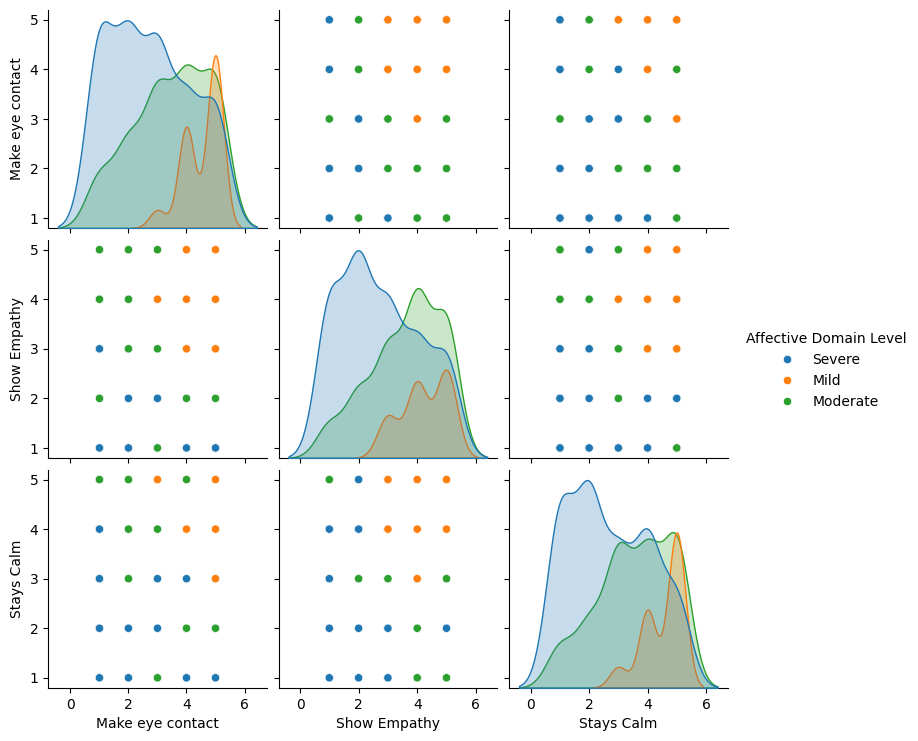

In [17]:
features_columns = ['Make eye contact', 'Show Empathy', 'Stays Calm']

columns_to_plot = features_columns + ['Affective Domain Level']

#create the pairplot
sns.pairplot(datasetAD[columns_to_plot], hue='Affective Domain Level', diag_kind='kde')
plt.show()

In [18]:
#fill null values
#columns with null values
columns_with_nulls = ['Show Empathy', 'Stays Calm', 'Make eye contact']

#fill missing values using median
for col in columns_with_nulls:
    datasetAD[col] = datasetAD.groupby('Affective Domain Level')[col].transform(lambda x: x.fillna(x.median()))

# Check if nulls are filled
print(datasetAD.isnull().sum())

Gender                            0
Age                               0
Family Member w/ Autism           0
Gets along with other children    0
Make eye contact                  0
Express Fellings                  0
Show Empathy                      0
Feels happy/angry with reason     0
Stays Calm                        0
Smiles not less sociably          0
Affective Domain Level            0
dtype: int64


In [19]:
datasetAD.head()

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,Female,14,Yes,3,3.0,4,2.0,3,2.0,2,Severe
1,Male,5,No,2,3.0,3,2.0,4,2.0,4,Severe
2,Female,12,No,5,4.0,5,5.0,4,3.0,5,Mild
3,Female,11,Yes,4,5.0,5,4.0,3,4.0,4,Moderate
4,Female,8,No,3,3.0,3,3.0,5,3.0,3,Moderate


In [20]:
print(datasetAD.dtypes)

Gender                             object
Age                                 int64
Family Member w/ Autism            object
Gets along with other children      int64
Make eye contact                  float64
Express Fellings                    int64
Show Empathy                      float64
Feels happy/angry with reason       int64
Stays Calm                        float64
Smiles not less sociably            int64
Affective Domain Level             object
dtype: object


.

Convert Intergers

In [21]:
float_columns = ['Show Empathy', 'Stays Calm', 'Make eye contact']

#convert float columns to integers
datasetAD[float_columns] = datasetAD[float_columns].astype(int)

print(datasetAD.dtypes)

Gender                            object
Age                                int64
Family Member w/ Autism           object
Gets along with other children     int64
Make eye contact                   int64
Express Fellings                   int64
Show Empathy                       int64
Feels happy/angry with reason      int64
Stays Calm                         int64
Smiles not less sociably           int64
Affective Domain Level            object
dtype: object


.

**Check Unique Values**

In [22]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [23]:
Gender = datasetAD.Gender.unique()
print(Gender)

['Female' 'Male']


In [24]:
Age = datasetAD.Age.unique()
print(Age)

[14  5 12 11  8 10  6 13  9  7  4]


In [25]:
Family_Member_Autism = datasetAD["Family Member w/ Autism"].unique()
print(Family_Member_Autism)

['Yes' 'No']


In [26]:
Gets_along_with_other_children = datasetAD["Gets along with other children"].unique()
print(Gets_along_with_other_children)

[3 2 5 4 1]


In [27]:
Make_eye_contact = datasetAD["Make eye contact"].unique()
print(Make_eye_contact)

[3 4 5 2 1]


In [28]:
Express_Fellings = datasetAD["Express Fellings"].unique()
print(Express_Fellings)

[4 3 5 2 1]


In [29]:
Show_Empathy = datasetAD["Show Empathy"].unique()
print(Show_Empathy)

[2 5 4 3 1]


In [30]:
Feels_happy_angry_with_reason = datasetAD["Feels happy/angry with reason"].unique()
print(Feels_happy_angry_with_reason)

[3 4 5 2 1]


In [31]:
Stays_Calm = datasetAD["Stays Calm"].unique()
print(Stays_Calm)

[2 3 4 1 5]


In [32]:
Smiles_not_less_sociably = datasetAD["Smiles not less sociably"].unique()
print(Smiles_not_less_sociably)

[2 4 5 3 1]


In [33]:
Affective_Domain_Level= datasetAD["Affective Domain Level"].unique()
print(Affective_Domain_Level)

['Severe' 'Mild' 'Moderate']


.

**Visualzations**

All Features

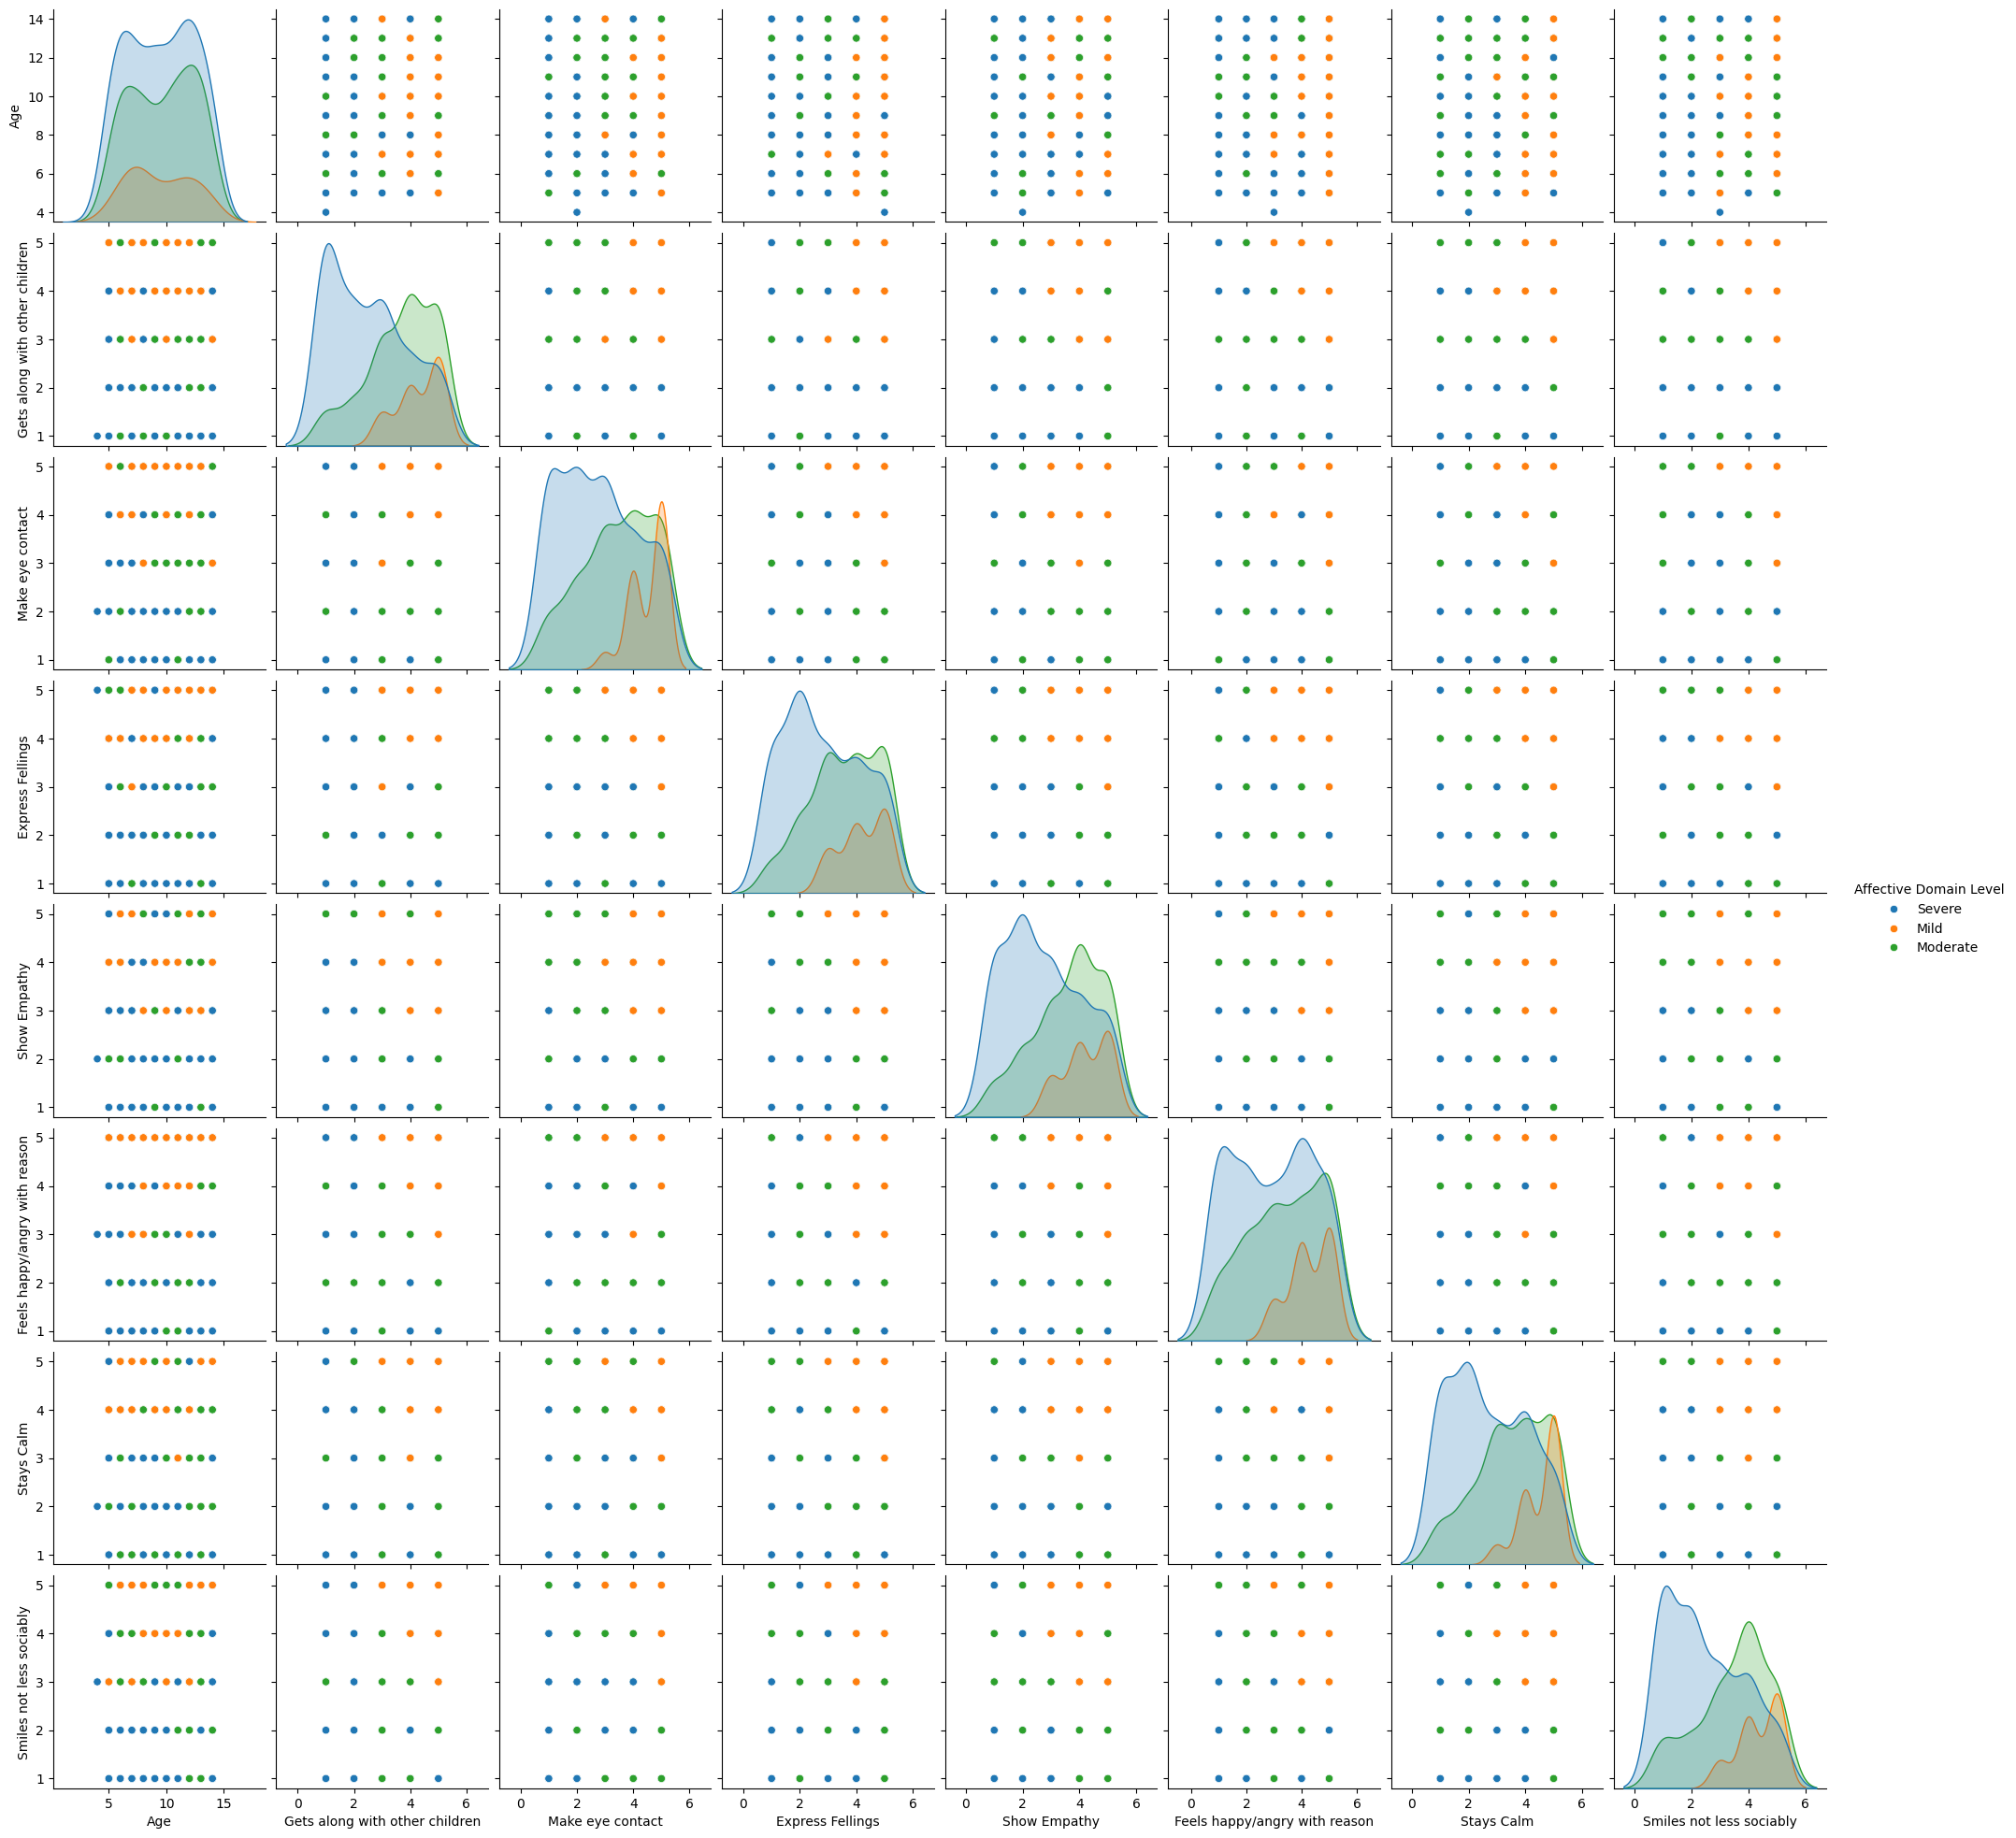

In [34]:
features_columns = ['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably']

columns_to_plot = features_columns + ['Affective Domain Level']

#create the pairplot
sns.pairplot(datasetAD[columns_to_plot], hue='Affective Domain Level', diag_kind='kde')
plt.show()

.

Age

Age
4      1
5     30
6     50
7     42
8     42
9     33
10    38
11    41
12    52
13    44
14    34
Name: count, dtype: int64


<ipython-input-35-ff662bd9c0af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis', label='Count')


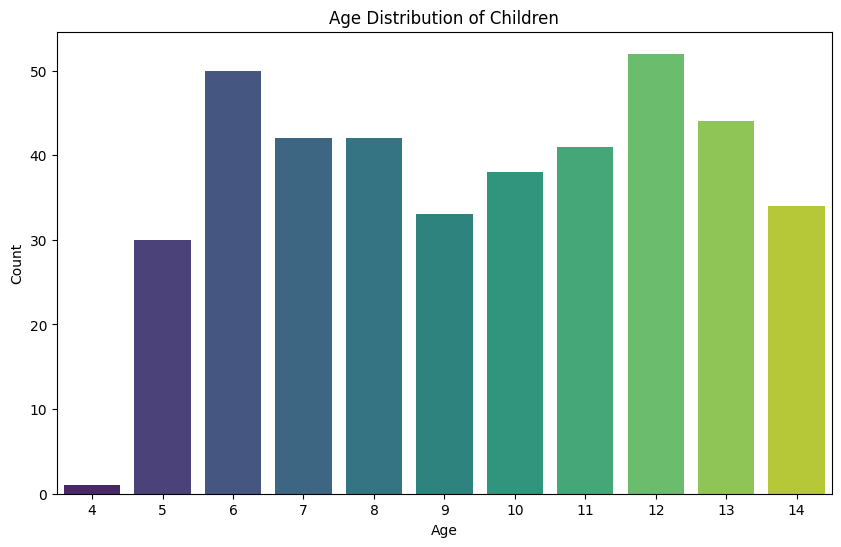

In [35]:
# Count the number of occurrences of each unique age and sort by age
age_counts = datasetAD['Age'].value_counts().sort_index()

# Ensure the age range starts from 4 to the max age present in the dataset
age_range = range(4, max(age_counts.index) + 1)

# Reindex the age_counts to include all ages from 4 to max and fill missing values with 0
age_counts = age_counts.reindex(age_range).fillna(0).astype(int)

# Print the counts of each age
print(age_counts)

# Plot a bar chart for age distribution
plt.figure(figsize=(10, 6))

# Bar plot (order by the age_counts index to ensure it's sorted)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis', label='Count')

# Overlay line chart
#plt.plot(age_counts.index, age_counts.values, color='orange', marker='o', label='Trend')

# Add text labels on top of the bars
# for i in range(len(age_counts)):
#     plt.text(age_counts.index[i], age_counts.values[i] + 0.2, str(age_counts.values[i]), ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Age Distribution of Children')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.legend()  # Add legend for bar and line
plt.show()


.

Gender

Gender
Male      216
Female    191
Name: count, dtype: int64


<ipython-input-36-f73c21ee29e8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


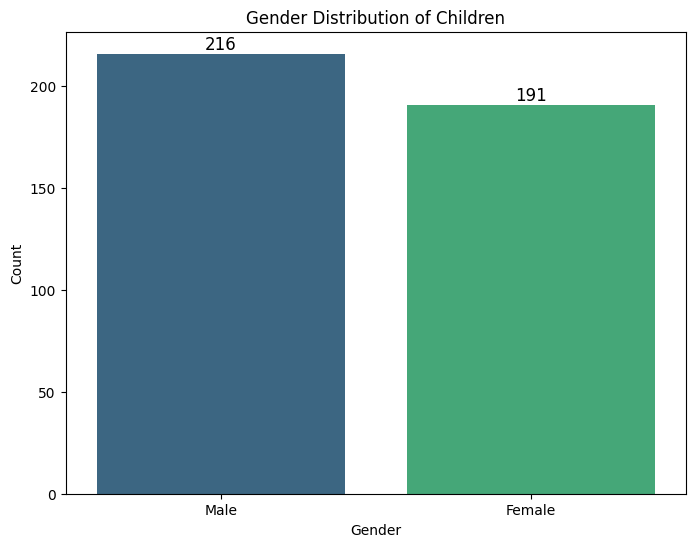

In [36]:
# Count the occurrences of each gender
gender_counts = datasetAD['Gender'].value_counts()

# Print the counts of each gender
print(gender_counts)

# Plot a bar chart for gender distribution
plt.figure(figsize=(8, 6))

# Bar plot for gender distribution
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Add text labels on top of the bars
for i in range(len(gender_counts)):
    plt.text(i, gender_counts.values[i] + 0.2, str(gender_counts.values[i]), ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Gender Distribution of Children')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


.

Affective Domain Level

Affective Domain Level
Severe      210
Moderate    148
Mild         49
Name: count, dtype: int64


<ipython-input-37-a76c81358e3b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=affective_domain_counts.index, y=affective_domain_counts.values, palette='viridis')


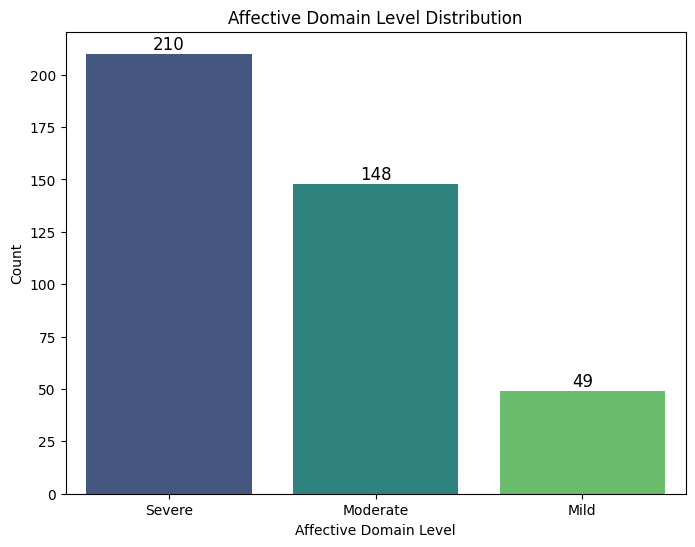

In [37]:
# Count the occurrences of each Affective Domain Level
affective_domain_counts = datasetAD['Affective Domain Level'].value_counts()

# Print the counts of each Affective Domain Level
print(affective_domain_counts)

# Plot a bar chart for Affective Domain Level distribution
plt.figure(figsize=(8, 6))

# Bar plot for Affective Domain Level distribution
sns.barplot(x=affective_domain_counts.index, y=affective_domain_counts.values, palette='viridis')

# Add text labels on top of the bars
for i in range(len(affective_domain_counts)):
    plt.text(i, affective_domain_counts.values[i] + 0.2, str(affective_domain_counts.values[i]), ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Affective Domain Level Distribution')
plt.xlabel('Affective Domain Level')
plt.ylabel('Count')
plt.show()


 .

**Encoding**

In [38]:
datasetAD

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,Female,14,Yes,3,3,4,2,3,2,2,Severe
1,Male,5,No,2,3,3,2,4,2,4,Severe
2,Female,12,No,5,4,5,5,4,3,5,Mild
3,Female,11,Yes,4,5,5,4,3,4,4,Moderate
4,Female,8,No,3,3,3,3,5,3,3,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
402,Female,7,Yes,3,5,3,5,5,5,5,Mild
403,Male,12,No,4,5,4,3,5,4,5,Mild
404,Female,11,No,4,5,5,4,5,3,4,Mild
405,Male,14,Yes,3,3,5,4,5,5,5,Mild


In [39]:
datasetAD.shape

(407, 11)

In [40]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [41]:
categorical_cols = ['Gender', 'Family Member w/ Autism']

#one-hot encoded columns
encoded_features = pd.get_dummies(datasetAD[categorical_cols], columns=categorical_cols, prefix=['Gender', 'FamilyHistory'], drop_first=True)
datasetAD = datasetAD.drop(columns=categorical_cols)
datasetAD = pd.concat([datasetAD, encoded_features], axis=1)

#converted to integers
bool_columns = datasetAD.select_dtypes(include=['bool']).columns
datasetAD[bool_columns] = datasetAD[bool_columns].astype(int)

In [42]:
datasetAD

,Age,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level,Gender_Male,FamilyHistory_Yes
0,14,3,3,4,2,3,2,2,Severe,0,1
1,5,2,3,3,2,4,2,4,Severe,1,0
2,12,5,4,5,5,4,3,5,Mild,0,0
3,11,4,5,5,4,3,4,4,Moderate,0,1
4,8,3,3,3,3,5,3,3,Moderate,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402,7,3,5,3,5,5,5,5,Mild,0,1
403,12,4,5,4,3,5,4,5,Mild,1,0
404,11,4,5,5,4,5,3,4,Mild,0,0
405,14,3,3,5,4,5,5,5,Mild,1,1


In [43]:
datasetAD.shape

(407, 11)

.

In [44]:
#encode 'Affective Domain Level' attribute

ADLevel_mapping = {'Severe': 2, 'Moderate': 1, 'Mild':0}

datasetAD['Affective Domain Level'] = datasetAD['Affective Domain Level'].map(ADLevel_mapping)
print(datasetAD["Affective Domain Level"].unique())

[2 0 1]


In [45]:
datasetAD

,Age,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level,Gender_Male,FamilyHistory_Yes
0,14,3,3,4,2,3,2,2,2,0,1
1,5,2,3,3,2,4,2,4,2,1,0
2,12,5,4,5,5,4,3,5,0,0,0
3,11,4,5,5,4,3,4,4,1,0,1
4,8,3,3,3,3,5,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402,7,3,5,3,5,5,5,5,0,0,1
403,12,4,5,4,3,5,4,5,0,1,0
404,11,4,5,5,4,5,3,4,0,0,0
405,14,3,3,5,4,5,5,5,0,1,1


In [46]:
datasetAD.shape

(407, 11)

Mild-0, Moderate-1, Severe-2

.

**Rearrange the order of the colomns**

In [47]:
reorder = ['Gender_Male', 'Age', 'FamilyHistory_Yes',
             'Gets along with other children', 'Make eye contact',
             'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
             'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level']

datasetAD = datasetAD[reorder]

In [48]:
datasetAD

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,0,14,1,3,3,4,2,3,2,2,2
1,1,5,0,2,3,3,2,4,2,4,2
2,0,12,0,5,4,5,5,4,3,5,0
3,0,11,1,4,5,5,4,3,4,4,1
4,0,8,0,3,3,3,3,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
402,0,7,1,3,5,3,5,5,5,5,0
403,1,12,0,4,5,4,3,5,4,5,0
404,0,11,0,4,5,5,4,5,3,4,0
405,1,14,1,3,3,5,4,5,5,5,0


.

In [49]:
datasetAD.describe()

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.530713,9.542998,0.461916,3.149877,3.213759,3.255528,3.223587,3.272727,3.226044,3.063882,1.395577
std,0.499670,2.837555,0.499161,1.431401,1.402323,1.345880,1.356115,1.409614,1.395986,1.405775,0.693588
min,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,10.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,12.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,2.000000
max,1.000000,14.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [50]:
datasetAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender_Male                     407 non-null    int64
 1   Age                             407 non-null    int64
 2   FamilyHistory_Yes               407 non-null    int64
 3   Gets along with other children  407 non-null    int64
 4   Make eye contact                407 non-null    int64
 5   Express Fellings                407 non-null    int64
 6   Show Empathy                    407 non-null    int64
 7   Feels happy/angry with reason   407 non-null    int64
 8   Stays Calm                      407 non-null    int64
 9   Smiles not less sociably        407 non-null    int64
 10  Affective Domain Level          407 non-null    int64
dtypes: int64(11)
memory usage: 35.1 KB


.

**Find Correlation**

In [51]:
#find the correlation between attributes(X) and target variable(Y)
datasetAD.corr()

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
Gender_Male,1.000000,0.032507,0.031858,0.002158,-0.018180,-0.048324,-0.026516,0.052772,0.046520,-0.013320,0.018161
Age,0.032507,1.000000,-0.050575,-0.054045,0.062369,0.073220,0.036220,-0.000784,0.031117,0.039445,-0.014295
FamilyHistory_Yes,0.031858,-0.050575,1.000000,-0.059213,-0.088625,-0.014809,-0.061982,0.100560,-0.037101,-0.154478,0.089864
Gets along with other children,0.002158,-0.054045,-0.059213,1.000000,0.077256,0.093859,0.099430,0.063921,0.039704,0.189853,-0.469215
Make eye contact,-0.018180,0.062369,-0.088625,0.077256,1.000000,0.110626,0.087487,0.036474,0.174050,0.030539,-0.413825
Express Fellings,-0.048324,0.073220,-0.014809,0.093859,0.110626,1.000000,0.108968,0.000826,0.026863,0.098100,-0.361852
Show Empathy,-0.026516,0.036220,-0.061982,0.099430,0.087487,0.108968,1.000000,-0.034555,0.108547,0.177245,-0.403264
Feels happy/angry with reason,0.052772,-0.000784,0.100560,0.063921,0.036474,0.000826,-0.034555,1.000000,0.091259,0.050848,-0.302082
Stays Calm,0.046520,0.031117,-0.037101,0.039704,0.174050,0.026863,0.108547,0.091259,1.000000,0.086756,-0.443630
Smiles not less sociably,-0.013320,0.039445,-0.154478,0.189853,0.030539,0.098100,0.177245,0.050848,0.086756,1.000000,-0.468055


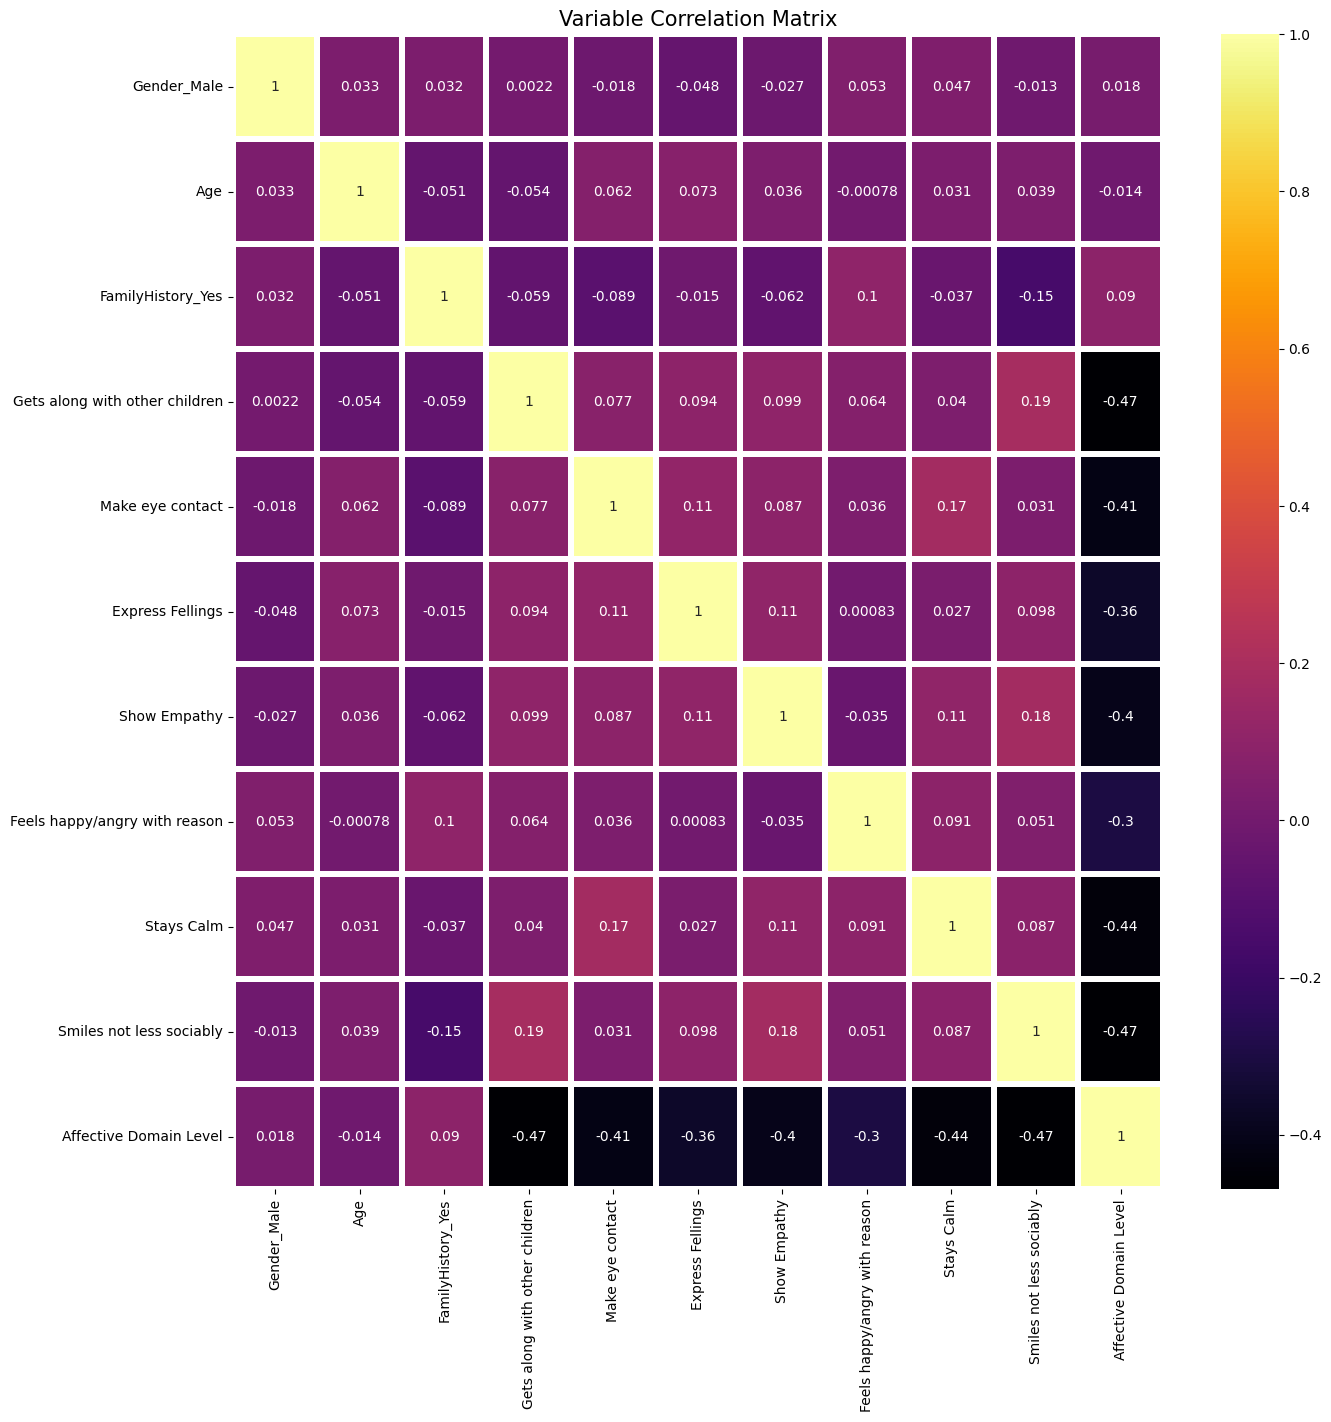

In [52]:
#format the plot
figAD, axAD = plt.subplots(figsize=(15, 15))

#create heatmap
sns.heatmap(datasetAD.corr(), ax=axAD, annot=True, linewidth=3, cmap="inferno")

#title
plt.title("Variable Correlation Matrix", size=15, y=1)

plt.show()

In [53]:
#sorting correlation values in decending order by Affective Domain Level
datasetAD.corr()["Affective Domain Level"].sort_values(ascending=False)

,Affective Domain Level
Affective Domain Level,1.000000
FamilyHistory_Yes,0.089864
Gender_Male,0.018161
Age,-0.014295
Feels happy/angry with reason,-0.302082
Express Fellings,-0.361852
Show Empathy,-0.403264
Make eye contact,-0.413825
Stays Calm,-0.443630
Smiles not less sociably,-0.468055


In [54]:
#remove the specified features
# datasetAD = datasetAD.drop(['Gender_Male'], axis=1)  # more closer to 0

# print(datasetAD.columns)

In [55]:
datasetAD.head()

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,0,14,1,3,3,4,2,3,2,2,2
1,1,5,0,2,3,3,2,4,2,4,2
2,0,12,0,5,4,5,5,4,3,5,0
3,0,11,1,4,5,5,4,3,4,4,1
4,0,8,0,3,3,3,3,5,3,3,1


In [56]:
print(datasetAD.isnull().sum())

Gender_Male                       0
Age                               0
FamilyHistory_Yes                 0
Gets along with other children    0
Make eye contact                  0
Express Fellings                  0
Show Empathy                      0
Feels happy/angry with reason     0
Stays Calm                        0
Smiles not less sociably          0
Affective Domain Level            0
dtype: int64


.

**Find Outliers**

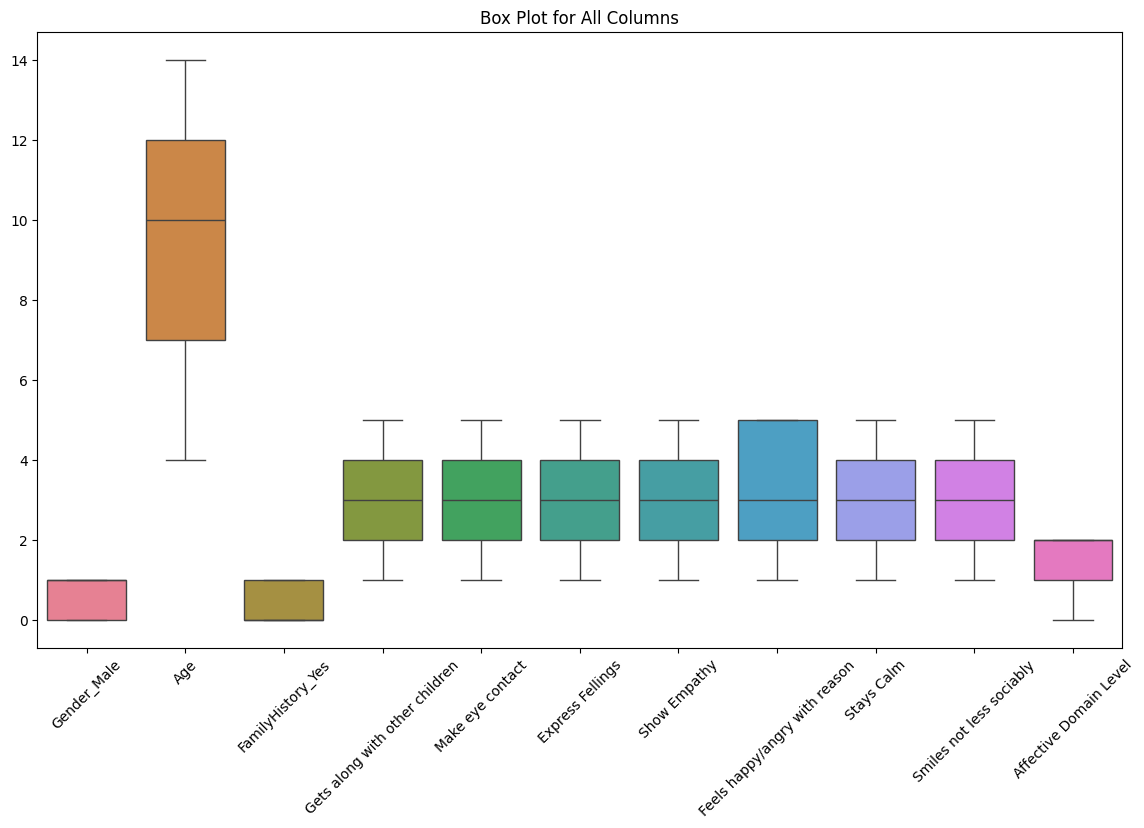

In [57]:
#create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=datasetAD)

plt.title('Box Plot for All Columns')
plt.xticks(rotation=45)
plt.show()

.

In [58]:
datasetAD.shape

(407, 11)

In [59]:
datasetAD.columns

Index(['Gender_Male', 'Age', 'FamilyHistory_Yes',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [60]:
datasetAD.rename(columns={"Gender_Male": "Gender", "FamilyHistory_Yes": "Family Member w/ Autism"}, inplace=True)



*   Male = 1 and Female = 0 [Gender]
*   Yes = 1 and No = 0 [FamilyHistory]



In [61]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [62]:
datasetAD

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,0,14,1,3,3,4,2,3,2,2,2
1,1,5,0,2,3,3,2,4,2,4,2
2,0,12,0,5,4,5,5,4,3,5,0
3,0,11,1,4,5,5,4,3,4,4,1
4,0,8,0,3,3,3,3,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
402,0,7,1,3,5,3,5,5,5,5,0
403,1,12,0,4,5,4,3,5,4,5,0
404,0,11,0,4,5,5,4,5,3,4,0
405,1,14,1,3,3,5,4,5,5,5,0


In [63]:
datasetAD.shape

(407, 11)

In [64]:
datasetAD.describe()

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.530713,9.542998,0.461916,3.149877,3.213759,3.255528,3.223587,3.272727,3.226044,3.063882,1.395577
std,0.499670,2.837555,0.499161,1.431401,1.402323,1.345880,1.356115,1.409614,1.395986,1.405775,0.693588
min,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,10.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,12.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,2.000000
max,1.000000,14.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [65]:
datasetAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          407 non-null    int64
 1   Age                             407 non-null    int64
 2   Family Member w/ Autism         407 non-null    int64
 3   Gets along with other children  407 non-null    int64
 4   Make eye contact                407 non-null    int64
 5   Express Fellings                407 non-null    int64
 6   Show Empathy                    407 non-null    int64
 7   Feels happy/angry with reason   407 non-null    int64
 8   Stays Calm                      407 non-null    int64
 9   Smiles not less sociably        407 non-null    int64
 10  Affective Domain Level          407 non-null    int64
dtypes: int64(11)
memory usage: 35.1 KB


.

In [66]:
#count of the each Affective Domain level
AD_level_counts = datasetAD['Affective Domain Level'].value_counts()
print(AD_level_counts)

Affective Domain Level
2    210
1    148
0     49
Name: count, dtype: int64


*   Moderate - 148
*   Mild - 49
*   Severe - 210

.

.

# **Split DataSet**

In [67]:
#assuming X and y are features and target variable
X = datasetAD.iloc[:,:-1].values
y = datasetAD.iloc[:,-1].values

In [68]:
data_size = len(X)

In [69]:
#calculate split indices
train_size = int(0.7 * data_size)
val_size = int(0.15 * data_size)
test_size = data_size - train_size - val_size

In [70]:
#split the data
X_train = X[:train_size]
y_train = y[:train_size]

In [71]:
X_val = X[train_size : train_size + val_size]
y_val = y[train_size : train_size + val_size]

In [72]:
X_test = X[train_size + val_size :]
y_test = y[train_size + val_size :]

In [73]:
#display sizes for neural network
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 284
Validation size: 61
Test size: 62


.

In [ ]:
 ********************* END OF THE EXECUTION ******************************************

.

# **Training Dataset Balanced [Using SMOTE]**

In [79]:
#apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

n_samples = 1200
X_train_balanced, y_train_balanced = resample(
    X_train_smote, y_train_smote, n_samples=n_samples, random_state=42, replace=True
)

#output the sizes of the datasets
print(f"Train size: {len(X_train_balanced)}")
# print(f"Validation size: {len(X_val)}")
# print(f"Test size: {len(X_test)}")

#display class distribution after balancing
print(pd.Series(y_train_balanced).value_counts())

Train size: 1200
2    414
1    409
0    377
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(




*   Mild - 377
*   Moderate - 409
*   Severe - 414




In [ ]:
#save to CSV
X_train_balanced_df = pd.DataFrame(X_train_balanced)
y_train_balanced_df = pd.Series(y_train_balanced)

Xtrain_balancedAD_file_path = '/content/drive/MyDrive/AffectiveDomain_XTrainSet_Balanced.csv'
X_train_balanced_df.to_csv(Xtrain_balancedAD_file_path, index=False)
print(f"Balanced Xtraining dataset saved to {Xtrain_balancedAD_file_path}")

Ytrain_balancedAD_file_path = '/content/drive/MyDrive/AffectiveDomain_YTrainSet_Balanced.csv'
y_train_balanced_df.to_csv(Ytrain_balancedAD_file_path, index=False)
print(f"Balanced Ytraining dataset saved to {Ytrain_balancedAD_file_path}")

In [75]:
# read balanced data from CSV
X_train_balanced = pd.read_csv('/content/drive/MyDrive/Affective Domain BE/AffectiveDomain_XTrainSet_Balanced.csv')  #X_train_balanced
y_train_balanced = pd.read_csv('/content/drive/MyDrive/Affective Domain BE/AffectiveDomain_YTrainSet_Balanced.csv')  #y_train_balanced

In [77]:
#output the sizes of the datasets for neural network
print(f"Train size: {len(X_train_balanced)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

#display counts after SMOTE
print(y_train_balanced.value_counts())

Train size: 1200
Validation size: 61
Test size: 62
0
2    414
1    409
0    377
Name: count, dtype: int64


**Visualization**

<ipython-input-80-6c17276b214d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=AD_level_counts_before.index, y=AD_level_counts_before.values, ax=axes[0], palette='viridis')
<ipython-input-80-6c17276b214d>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(AD_level_counts_before.index, rotation=0)
<ipython-input-80-6c17276b214d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=AD_level_counts_after.index, y=AD_level_counts_after.values, ax=axes[1], palette='viridis')
<ipython-input-80-6c17276b214d>:36: UserWarning: set_ticklabels() should only be used with a fixed number of tic

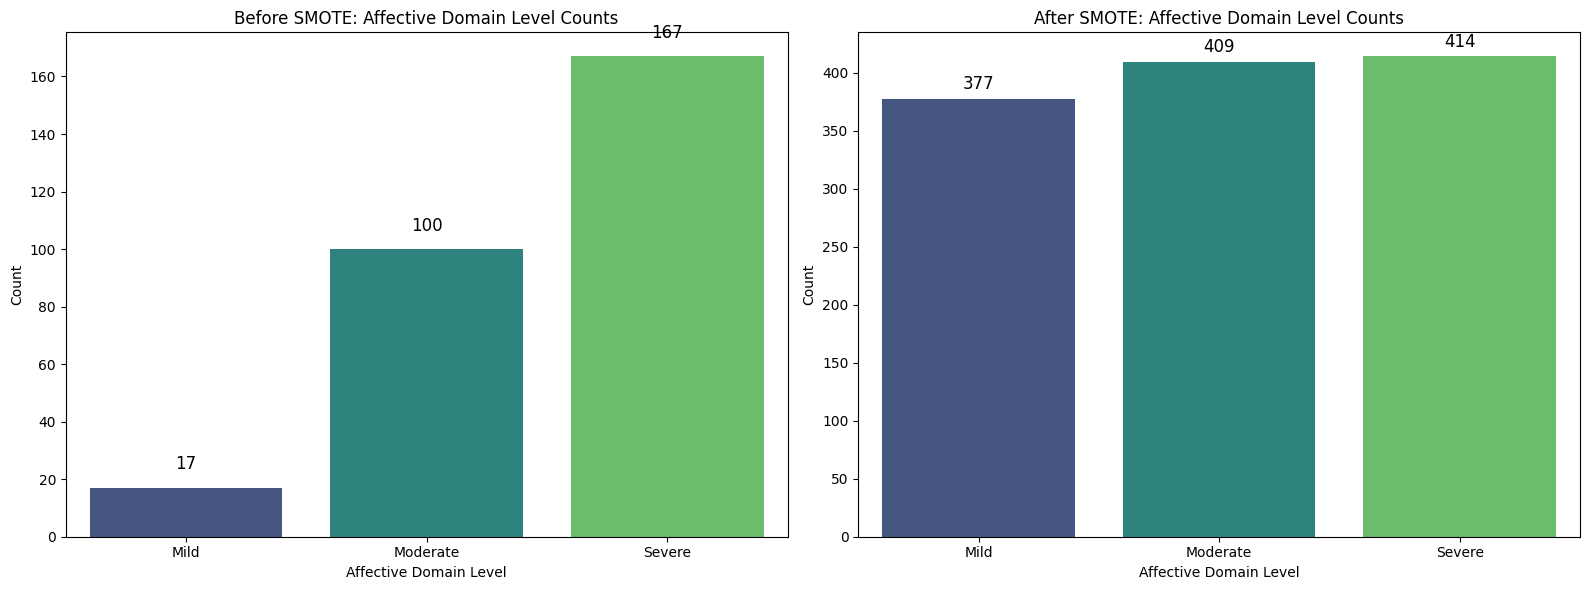

In [80]:
# Convert y_train and y_train_balanced to pandas Series to use value_counts
y_train_series = pd.Series(y_train)
y_train_balanced_series = pd.Series(y_train_balanced)

ADLevel_mapping = {2: 'Severe', 1: 'Moderate', 0: 'Mild'}

# Map the levels back to readable form for visualization
y_train_series = y_train_series.map(ADLevel_mapping)
y_train_balanced_series = y_train_balanced_series.map(ADLevel_mapping)

# Get the counts of each Affective Domain Level in the original training set
AD_level_counts_before = y_train_series.value_counts().sort_index()

# Get the counts of each Affective Domain Level in the balanced training set
AD_level_counts_after = y_train_balanced_series.value_counts().sort_index()

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for before SMOTE (original training set)
sns.barplot(x=AD_level_counts_before.index, y=AD_level_counts_before.values, ax=axes[0], palette='viridis')
axes[0].set_title('Before SMOTE: Affective Domain Level Counts')
axes[0].set_xlabel('Affective Domain Level')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(AD_level_counts_before.index, rotation=0)

# Add counts on top of the bars for before SMOTE
for i, count in enumerate(AD_level_counts_before.values):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12)

# Plot for after SMOTE (balanced training set)
sns.barplot(x=AD_level_counts_after.index, y=AD_level_counts_after.values, ax=axes[1], palette='viridis')
axes[1].set_title('After SMOTE: Affective Domain Level Counts')
axes[1].set_xlabel('Affective Domain Level')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(AD_level_counts_after.index, rotation=0)

# Add counts on top of the bars for after SMOTE
for i, count in enumerate(AD_level_counts_after.values):
    axes[1].text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()


.

# **Model Training**

In [23]:
X_trainB = X_train_balanced
y_trainB = y_train_balanced

NameError: name 'X_train_balanced' is not defined

Normalization

In [82]:
#initialize the scaler
scaler = StandardScaler()

In [83]:
#fit the scaler
X_trainB_scaled = scaler.fit_transform(X_trainB)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# **Random Forest**

**Before Hyperparameter Tuning**

In [177]:
#initialize random forest classifier
modelrf = RandomForestClassifier(random_state=42)

In [178]:
#fit the model
modelrf.fit(X_trainB, y_trainB)

RandomForestClassifier(random_state=42)

**Before Hypertune**

In [179]:
#predictions on training, validaion and test sets
y_train_pred_rfB = modelrf.predict(X_trainB)
y_val_pred_rfB = modelrf.predict(X_val)
y_test_pred_rfB = modelrf.predict(X_test)

In [180]:
#mean squard error(MSE)
train_mse_rfB = mean_squared_error(y_trainB, y_train_pred_rfB)
val_mse_rfB = mean_squared_error(y_val, y_val_pred_rfB)
test_mse_rfB = mean_squared_error(y_test, y_test_pred_rfB)

In [181]:
print(f"Training Mean Squard Error(MSE) -  Random Forest: {train_mse_rfB}")
print(f"Validation Mean Squard Error(MSE) -  Random Forest: {val_mse_rfB}")
print(f"Test Mean Squard Error(MSE) -  Random Forest: {test_mse_rfB}")

Training Mean Squard Error(MSE) -  Random Forest: 0.0
Validation Mean Squard Error(MSE) -  Random Forest: 0.18032786885245902
Test Mean Squard Error(MSE) -  Random Forest: 0.1774193548387097


In [182]:
train_accuracy_rfB = 1 - train_mse_rfB
val_accuracy_rfB = 1 - val_mse_rfB
test_accuracy_rfB = 1 - test_mse_rfB

In [183]:
print(f"Training Accuracy -  Random Forest: {train_accuracy_rfB}")
print(f"Validation Accuracy -  Random Forest: {val_accuracy_rfB}")
print(f"Test Accuracy -  Random Forest: {test_accuracy_rfB}")

Training Accuracy -  Random Forest: 1.0
Validation Accuracy -  Random Forest: 0.819672131147541
Test Accuracy -  Random Forest: 0.8225806451612903


Classification Reports

In [184]:
print("Classification Report for Training Set(Random Forest):")
print(classification_report(y_trainB, y_train_pred_rfB))

print("Classification Report for Validation Set(Random Forest):")
print(classification_report(y_val, y_val_pred_rfB))

print("Classification Report for Test Set(Random Forest):")
print(classification_report(y_test, y_test_pred_rfB))

Classification Report for Training Set(Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       414

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Classification Report for Validation Set(Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      0.68      0.76        25
           2       0.76      0.96      0.85        27

    accuracy                           0.82        61
   macro avg       0.87      0.81      0.83        61
weighted avg       0.83      0.82      0.82        61

Classification Report for Test Set(Random Forest):
              precision    recall  f1-score   support

           0       0

Confusion Matrix

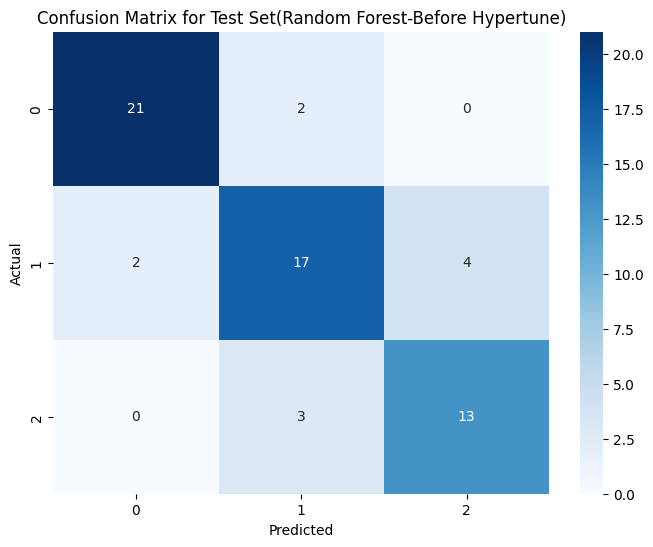

In [185]:
cm = confusion_matrix(y_test, y_test_pred_rfB)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set(Random Forest-Before Hypertune)')
plt.show()

Plot Accuaracy

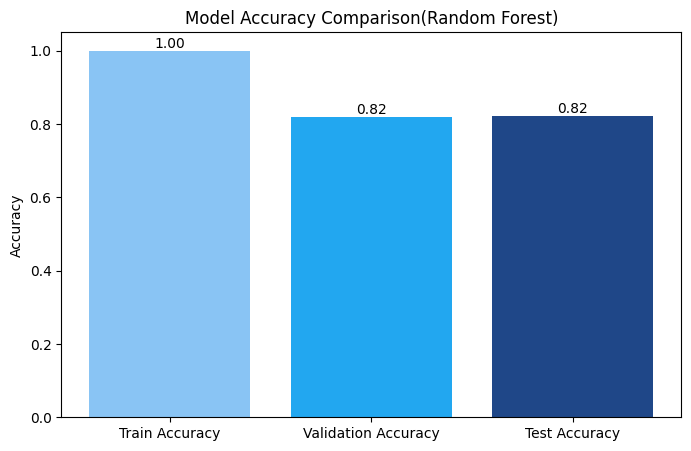

In [186]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    ["Train Accuracy", "Validation Accuracy", "Test Accuracy"],
    [train_accuracy_rfB, val_accuracy_rfB, test_accuracy_rfB],
    color=["#89C4F4", "#22A7F0", "#1F4788"],
)

#add value counts
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison(Random Forest)")
plt.show()


Plot Mean Squard Error(MSE)

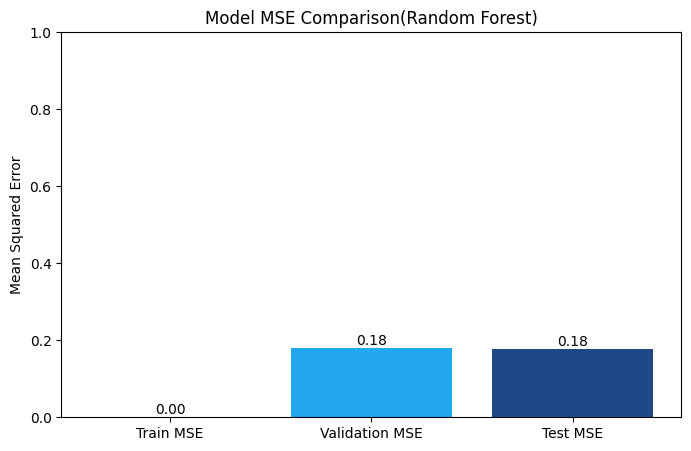

In [187]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    ["Train MSE", "Validation MSE", "Test MSE"],
    [train_mse_rfB, val_mse_rfB, test_mse_rfB],
    color=["#89C4F4", "#22A7F0", "#1F4788"],
)

#add value counts
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.ylim(0, 1)
plt.ylabel("Mean Squared Error")
plt.title("Model MSE Comparison(Random Forest)")
plt.show()

.

**After Hypertune**

In [188]:
#use GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 5],
    "max_features": ['auto', 'sqrt', 'log2'],
    "bootstrap": [True, False],
    "class_weight": ['balanced', None],
}

#instantiate RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', return_train_score=True)

In [189]:
#fit GridSearchCV on the training set
grid_search.fit(X_trainB, y_trainB)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [190]:
#best hyperparameters
best_params = grid_search.best_params_
print("Random Forest Best Parameters:", best_params)

Random Forest Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [191]:
#train the best model
best_rf_model = grid_search.best_estimator_

In [192]:
#evaluate
y_train_pred_rfA = best_rf_model.predict(X_trainB)
y_val_pred_rfA = best_rf_model.predict(X_val)
y_test_pred_rfA = best_rf_model.predict(X_test)

print("Hypertuning Training Accuracy of Random Forest:", accuracy_score(y_trainB, y_train_pred_rfA))
print("Hypertuning Validation Accuracy of Random Forest:", accuracy_score(y_val, y_val_pred_rfA))
print("Hypertuning Test Accuracy of Random Forest:", accuracy_score(y_test, y_test_pred_rfA))

Hypertuning Training Accuracy of Random Forest: 1.0
Hypertuning Validation Accuracy of Random Forest: 0.8032786885245902
Hypertuning Test Accuracy of Random Forest: 0.7903225806451613


Visualize Hypertuning Accuracy

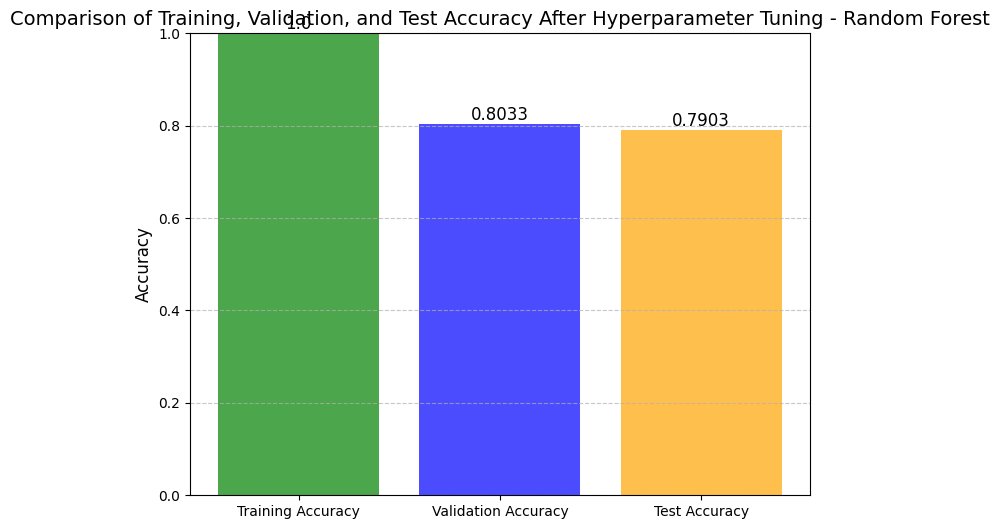

In [193]:
training_accuracy_rfA = accuracy_score(y_trainB, y_train_pred_rfA)
validation_accuracy_rfA = accuracy_score(y_val, y_val_pred_rfA)
test_accuracy_rfA = accuracy_score(y_test, y_test_pred_rfA)

x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [training_accuracy_rfA, validation_accuracy_rfA, test_accuracy_rfA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'orange'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Training, Validation, and Test Accuracy After Hyperparameter Tuning - Random Forest", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Mean Squard Error(MSE)

In [194]:
#predictions on training, validaion and test sets
y_train_predBest_rfA = modelrf.predict(X_trainB)
y_val_predBest_rfA = modelrf.predict(X_val)
y_test_predBest_rfA = modelrf.predict(X_test)

In [195]:
#mean squard error(MSE)
train_mse_rfA = mean_squared_error(y_trainB, y_train_predBest_rfA)
val_mse_rfA = mean_squared_error(y_val, y_val_predBest_rfA)
test_mse_rfA = mean_squared_error(y_test, y_test_predBest_rfA)

print(f"Hypertuning Training Mean Squard Error(MSE) of Random Forest: {train_mse_rfA}")
print(f"Hypertuning Validation Mean Squard Error(MSE) of Random Forest: {val_mse_rfA}")
print(f"Hypertuning Test Mean Squard Error(MSE) of Random Forest: {test_mse_rfA}")

Hypertuning Training Mean Squard Error(MSE) of Random Forest: 0.0
Hypertuning Validation Mean Squard Error(MSE) of Random Forest: 0.18032786885245902
Hypertuning Test Mean Squard Error(MSE) of Random Forest: 0.1774193548387097


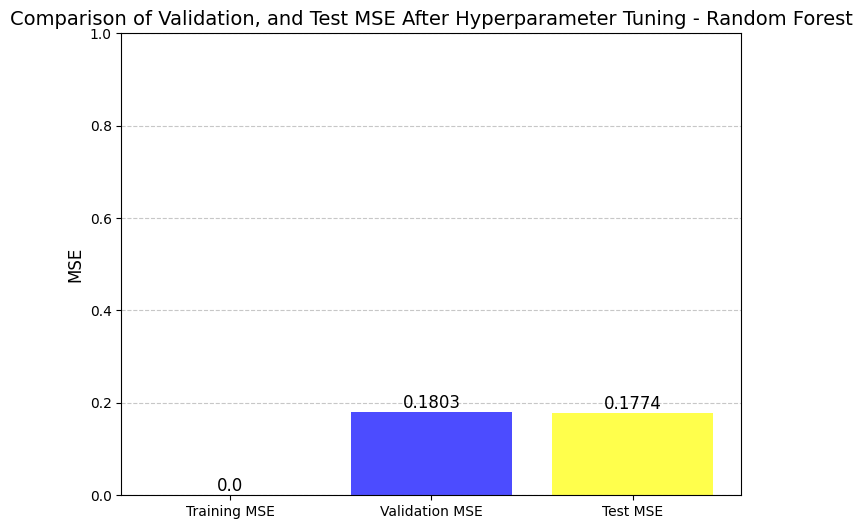

In [196]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [train_mse_rfA, val_mse_rfA, test_mse_rfA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test MSE After Hyperparameter Tuning - Random Forest", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Accuracy

In [197]:
train_accuracy_rfA  = 1 - train_mse_rfA
val_accuracy_rfA = 1 - val_mse_rfA
test_accuracy_rfA = 1 - test_mse_rfA

print(f"Hypertuning Training Accuracy of Random Forest: {train_accuracy_rfA}")
print(f"Hypertuning Validation Accuracy of Random Forest: {val_accuracy_rfA}")
print(f"Hypertuning Test Accuracy of Random Forest: {test_accuracy_rfA}")

Hypertuning Training Accuracy of Random Forest: 1.0
Hypertuning Validation Accuracy of Random Forest: 0.819672131147541
Hypertuning Test Accuracy of Random Forest: 0.8225806451612903


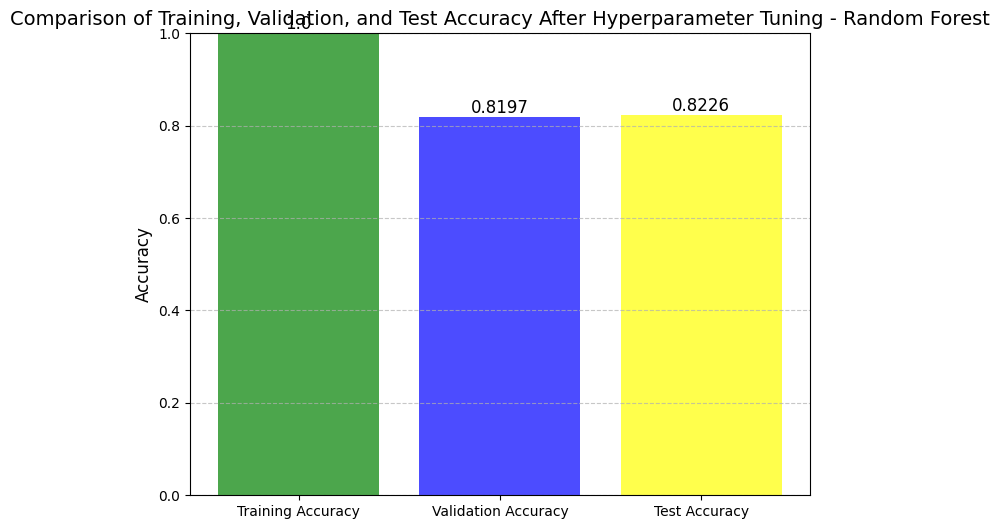

In [198]:
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [train_accuracy_rfA, val_accuracy_rfA, test_accuracy_rfA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Training, Validation, and Test Accuracy After Hyperparameter Tuning - Random Forest", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confusion Matrix

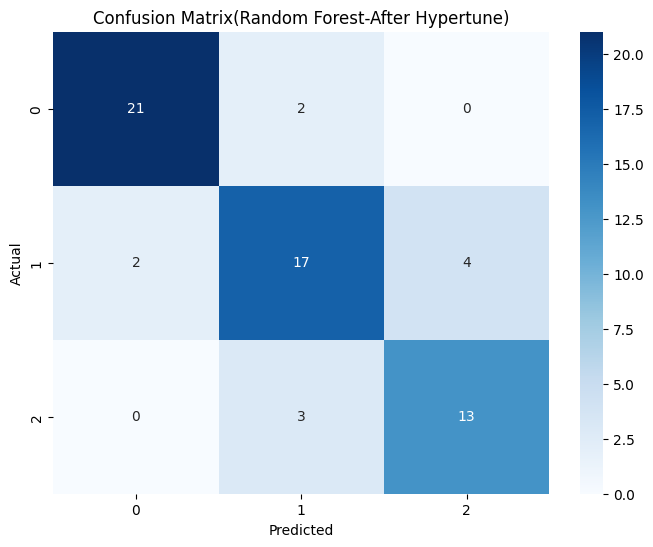

In [199]:
cm = confusion_matrix(y_test, y_test_predBest_rfA)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Random Forest-After Hypertune)')
plt.show()

Clasification Reports

In [200]:
#for the train set
train_classification_report = classification_report(y_trainB, y_train_predBest_rfA)

#for the validation set
val_classification_report = classification_report(y_val, y_val_predBest_rfA)

#for the test set
test_classification_report = classification_report(y_test, y_test_predBest_rfA)

#print the classification reports
print("Hypertuning Training Classification Report(Random Forest):\n", train_classification_report)
print("Hypertuning Validation Classification Report(Random Forest):\n", val_classification_report)
print("\nHypertuning Test Classification Report(Random Forest):\n", test_classification_report)

Hypertuning Training Classification Report(Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       414

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Hypertuning Validation Classification Report(Random Forest):
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      0.68      0.76        25
           2       0.76      0.96      0.85        27

    accuracy                           0.82        61
   macro avg       0.87      0.81      0.83        61
weighted avg       0.83      0.82      0.82        61


Hypertuning Test Classification Report(Random Forest):
               precision    recall  f1-score   support

    

In [201]:
# Create a pickle file for the Random Forest model
rf_AD_model_pickle = open('rf_ADmodel.pkl', 'wb')
pickle.dump(best_rf_model, rf_AD_model_pickle)
rf_AD_model_pickle.close()

.

.

# **K-Nearest Neighbors (KNN)**

In [152]:
#train the initial KNN model
knn = KNeighborsClassifier()
knn.fit(X_trainB_scaled, y_trainB)

KNeighborsClassifier()

**Before Hypertune**

In [153]:
#predict on train, validation, and test sets
y_train_pred_knnB = knn.predict(X_trainB_scaled)
y_val_pred_knnB = knn.predict(X_val_scaled)
y_test_pred_knnB = knn.predict(X_test_scaled)

In [154]:
#classification report
print("\nClassification Report for Training Set(KNN - Before Hypertune):")
print(classification_report(y_trainB, y_train_pred_knnB))

print("\nClassification Report for Validation Set(KNN - Before Hypertune):")
print(classification_report(y_val, y_val_pred_knnB))

print("\nClassification Report for Test Set(KNN - Before Hypertune):")
print(classification_report(y_test, y_test_pred_knnB))


Classification Report for Training Set(KNN - Before Hypertune):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       0.94      0.98      0.96       409
           2       0.99      0.94      0.96       414

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200


Classification Report for Validation Set(KNN - Before Hypertune):
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.60      0.72      0.65        25
           2       0.86      0.70      0.78        27

    accuracy                           0.69        61
   macro avg       0.67      0.66      0.66        61
weighted avg       0.71      0.69      0.69        61


Classification Report for Test Set(KNN - Before Hypertune):
              precision    recall  f1-score  

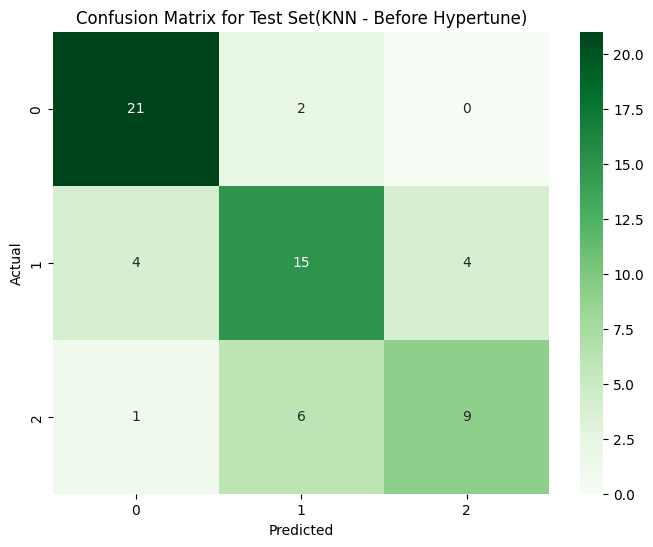

In [155]:
#confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred_knnB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(KNN - Before Hypertune)")
plt.show()

Mean Squard Error(MSE)

In [157]:
train_mse_knnB = mean_squared_error(y_trainB, y_train_pred_knnB)
val_mse_knnB = mean_squared_error(y_val, y_val_pred_knnB)
test_mse_knnB = mean_squared_error(y_test, y_test_pred_knnB)

In [ ]:
print(f"KNN Training Mean Squard Error(MSE) - Before Hypertuning: {train_mse_knnB}")
print(f"KNN Validation Mean Squard Error(MSE) - Before Hypertuning: {val_mse_knnB}")
print(f"KNN Test Mean Squard Error(MSE) - Before Hypertuning: {test_mse_knnB}")

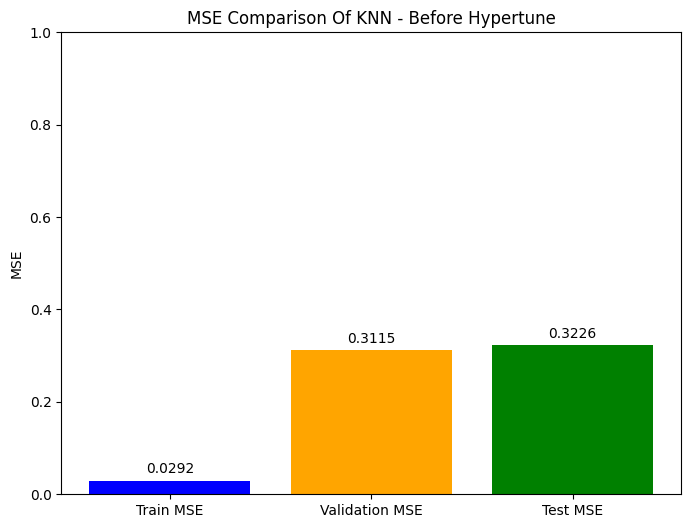

In [158]:
#plot MSE
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_knnB, val_mse_knnB, test_mse_knnB], color=["blue", "orange", "green"])
plt.title("MSE Comparison Of KNN - Before Hypertune")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()

Accuracy

In [159]:
train_acc_knnB = 1 - train_mse_knnB
val_acc_knnB = 1 - val_mse_knnB
test_acc_knnB = 1 - test_mse_knnB

In [160]:
print(f"KNN Training Accuracy: {train_acc_knnB}")
print(f"KNN Validation Accuracy: {val_acc_knnB}")
print(f"KNN Test Accuracy: {test_acc_knnB}")

KNN Training Accuracy: 0.9708333333333333
KNN Validation Accuracy: 0.6885245901639344
KNN Test Accuracy: 0.6774193548387097


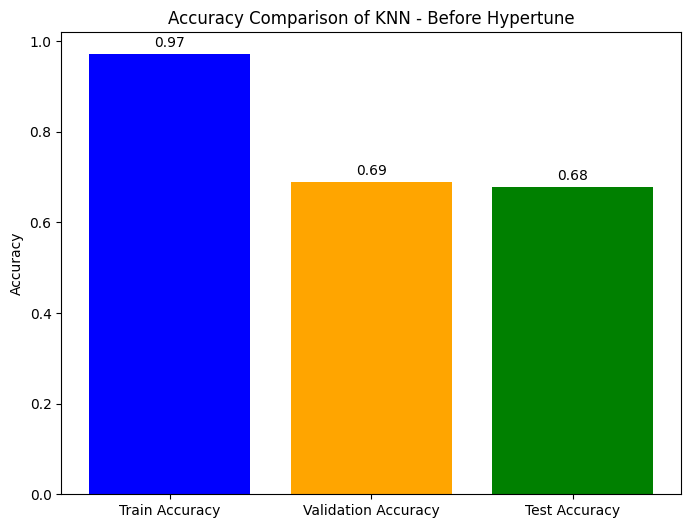

In [161]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_knnB, val_acc_knnB, test_acc_knnB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison of KNN - Before Hypertune")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

**After Hypertune**

In [162]:
#reinitialize and scale the data
X_trainB_scaled = scaler.fit_transform(X_trainB)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [163]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#initialize KNN
knn = KNeighborsClassifier()

#GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

#fit GridSearchCV
grid_search_knn.fit(X_trainB_scaled, y_trainB)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [164]:
#best parameters and model
if hasattr(grid_search_knn, 'best_params_'):
    best_params_knn = grid_search_knn.best_params_
    print("Best Hyperparameters for KNN:", best_params_knn)
else:
    print("GridSearchCV did not complete successfully.")

Best Hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [165]:
best_knn_model = grid_search_knn.best_estimator_

In [166]:
#evaluate the tuned model
y_trainpred_best_knnA = best_knn_model.predict(X_trainB_scaled)
y_TValpred_best_knnA = best_knn_model.predict(X_val_scaled)
y_Testpred_best_knnA = best_knn_model.predict(X_test_scaled)

print("Best Model Train Accuracy(KNN - After Hypertuning):", accuracy_score(y_trainB, y_trainpred_best_knnA))
print("Best Model Validation Accuracy(KNN - After Hypertuning):", accuracy_score(y_val, y_TValpred_best_knnA))
print("Best Model Test Accuracy:", accuracy_score(y_test, y_Testpred_best_knnA))

Best Model Train Accuracy(KNN - After Hypertuning): 1.0
Best Model Validation Accuracy(KNN - After Hypertuning): 0.7213114754098361
Best Model Test Accuracy: 0.7419354838709677


Visualizing Hyperparameter Tuning Results

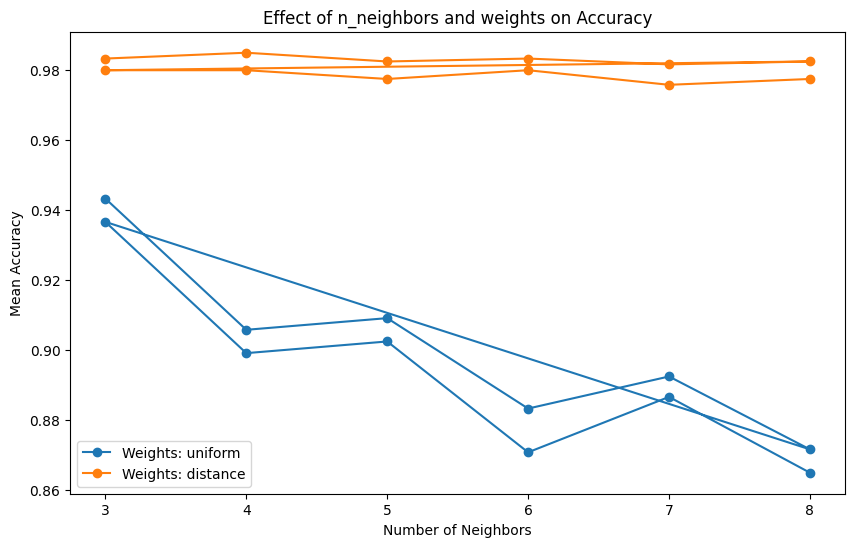

In [167]:
#extract results
results = pd.DataFrame(grid_search_knn.cv_results_)

#plotting accuracy for different n_neighbors
plt.figure(figsize=(10, 6))
for weight in results["param_weights"].unique():
    subset = results[results["param_weights"] == weight]
    plt.plot(
        subset["param_n_neighbors"],
        subset["mean_test_score"],
        marker="o",
        label=f"Weights: {weight}",
    )

plt.xlabel("Number of Neighbors")
plt.ylabel("Mean Accuracy")
plt.title("Effect of n_neighbors and weights on Accuracy")
plt.legend()
plt.show()

**Mean Squard Error(MSE)**

In [168]:
trainmse_knnA = mean_squared_error(y_trainB, y_trainpred_best_knnA)
valmse_knnA = mean_squared_error(y_val, y_TValpred_best_knnA)
testmse_knnA = mean_squared_error(y_test, y_Testpred_best_knnA)

print("Hypertuning KNN Mean Squared Error (MSE) of Training:", trainmse_knnA)
print("Hypertuning KNN Mean Squared Error (MSE) of Validation:", valmse_knnA)
print("Hypertuning KNN Mean Squared Error (MSE) of Testing:", testmse_knnA)

Hypertuning KNN Mean Squared Error (MSE) of Training: 0.0
Hypertuning KNN Mean Squared Error (MSE) of Validation: 0.2786885245901639
Hypertuning KNN Mean Squared Error (MSE) of Testing: 0.3064516129032258


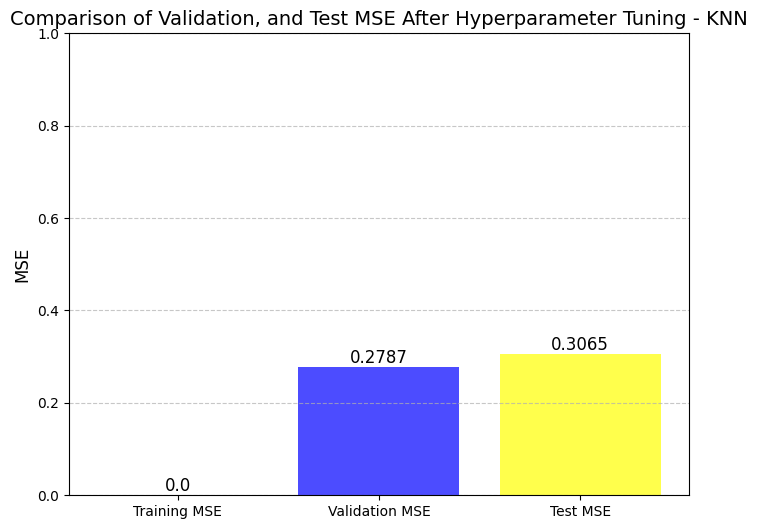

In [170]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [trainmse_knnA, valmse_knnA, testmse_knnA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test MSE After Hyperparameter Tuning - KNN", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

Accuracy

In [171]:
trainAcc_knnA = 1 - trainmse_knnA
valAcc_knnA = 1 - valmse_knnA
testAcc_knnA = 1 - testmse_knnA

print("Hypertuning KNN Training Accuracy:", trainAcc_knnA)
print("Hypertuning KNN Validation Accuracy:", valAcc_knnA)
print("Hypertuning KNN Test Accuracy:", testAcc_knnA)

Hypertuning KNN Training Accuracy: 1.0
Hypertuning KNN Validation Accuracy: 0.7213114754098361
Hypertuning KNN Test Accuracy: 0.6935483870967742


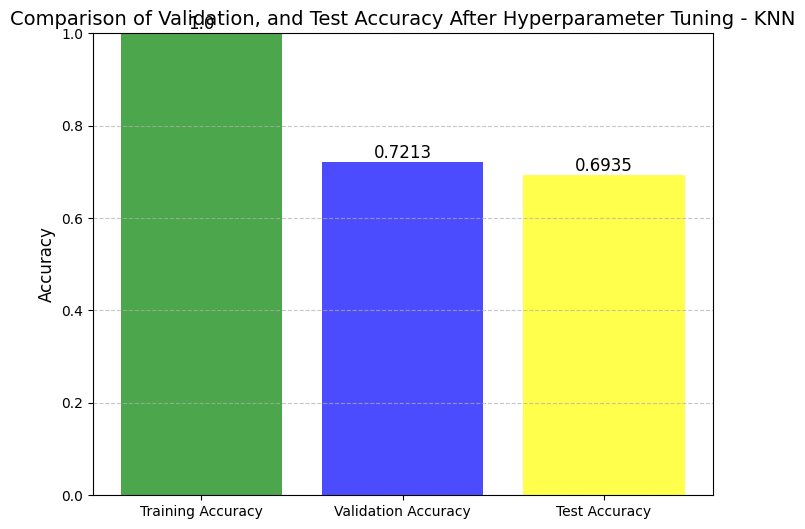

In [173]:
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [trainAcc_knnA, valAcc_knnA, testAcc_knnA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test Accuracy After Hyperparameter Tuning - KNN", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confussion Matrix

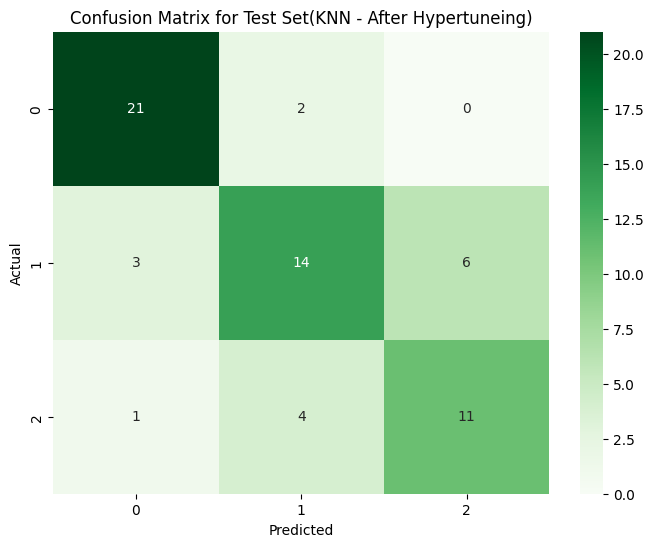

In [174]:
#for test set
cm = confusion_matrix(y_test, y_Testpred_best_knnA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(KNN - After Hypertuneing)")
plt.show()

Clasification Report

In [175]:
#for the validation set
train_classification_report = classification_report(y_trainB, y_trainpred_best_knnA)

#for the validation set
val_classification_report = classification_report(y_val, y_TValpred_best_knnA)

#for the test set
test_classification_report = classification_report(y_test, y_Testpred_best_knnA)

#print the classification reports
print("Hypertuning Training Classification Report(KNN):\n", train_classification_report)
print("Hypertuning Validation Classification Report(KNN):\n", val_classification_report)
print("\nHypertuning Test Classification Report(KNN):\n", test_classification_report)

Hypertuning Training Classification Report(KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       414

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Hypertuning Validation Classification Report(KNN):
               precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.64      0.72      0.68        25
           2       0.88      0.78      0.82        27

    accuracy                           0.72        61
   macro avg       0.69      0.68      0.69        61
weighted avg       0.73      0.72      0.72        61


Hypertuning Test Classification Report(KNN):
               precision    recall  f1-score   support

           0       0.84      0.91 

In [176]:
#create a pickle file for KNN model
knn_AD_model_pickle = open('knn_ADmodel.pkl', 'wb')
pickle.dump(best_knn_model, knn_AD_model_pickle)
knn_AD_model_pickle.close()

.

.

# **Naive Bayes**

In [125]:
#train the initial Naive Bayes model
nb = GaussianNB()
nb.fit(X_trainB, y_trainB)

GaussianNB()

**Before Hypertune**

In [126]:
#predict on train, validation, and test sets
y_train_pred_nbB = nb.predict(X_trainB)
y_val_pred_nbB = nb.predict(X_val)
y_test_pred_nbB = nb.predict(X_test)

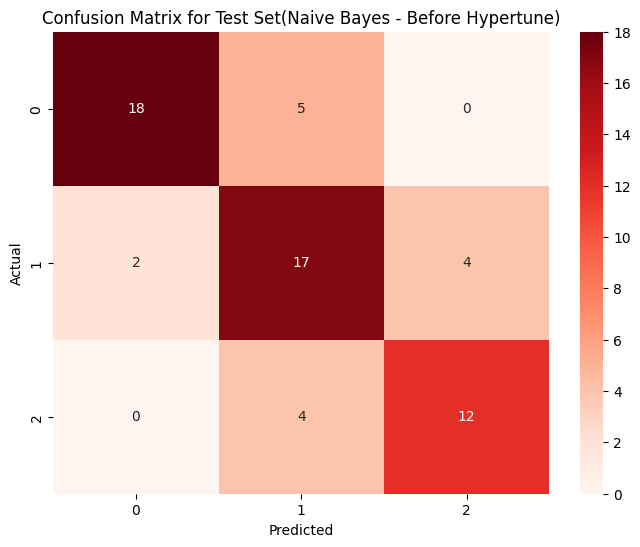

In [127]:
#confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred_nbB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(Naive Bayes - Before Hypertune)")
plt.show()

In [128]:
#classification reports
print("\nClassification Report for Training Set(Naive Bayes - Before Hypertune):")
print(classification_report(y_trainB, y_train_pred_nbB))

print("\nClassification Report for Validation Set(Naive Bayes - Before Hypertune):")
print(classification_report(y_val, y_val_pred_nbB))

print("\nClassification Report for Test Set(Naive Bayes - Before Hypertune):")
print(classification_report(y_test, y_test_pred_nbB))


Classification Report for Training Set(Naive Bayes - Before Hypertune):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       377
           1       0.87      0.84      0.85       409
           2       0.87      0.87      0.87       414

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200


Classification Report for Validation Set(Naive Bayes - Before Hypertune):
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.86      0.76      0.81        25
           2       0.84      0.96      0.90        27

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61


Classification Report for Test Set(Naive Bayes - Before Hypertune):
              precisi

Mean Squard Error(MSE)

In [129]:
train_mse_nbB = mean_squared_error(y_trainB, y_train_pred_nbB)
val_mse_nbB = mean_squared_error(y_val, y_val_pred_nbB)
test_mse_nbB = mean_squared_error(y_test, y_test_pred_nbB)

In [130]:
print(f"Naive Bayes Training Mean Squard Error(MSE): {train_mse_nbB}")
print(f"Naive Bayes Validation Mean Squard Error(MSE): {val_mse_nbB}")
print(f"Naive Bayes Test Mean Squard Error(MSE): {test_mse_nbB}")

Naive Bayes Training Mean Squard Error(MSE): 0.09833333333333333
Naive Bayes Validation Mean Squard Error(MSE): 0.14754098360655737
Naive Bayes Test Mean Squard Error(MSE): 0.24193548387096775


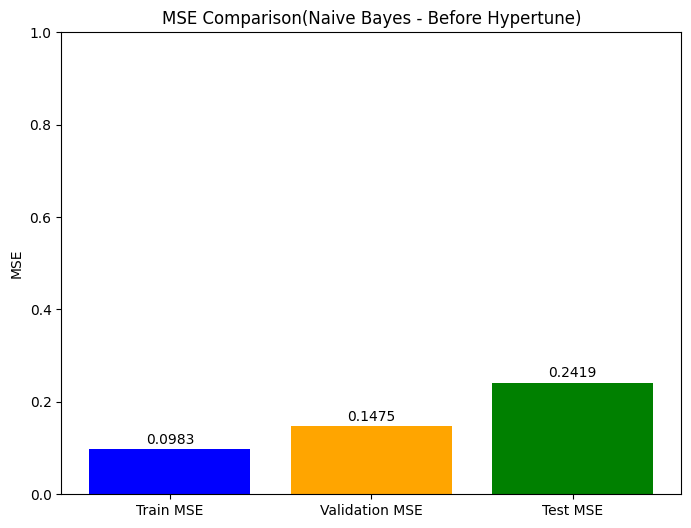

In [131]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_nbB, val_mse_nbB, test_mse_nbB], color=["blue", "orange", "green"])
plt.title("MSE Comparison(Naive Bayes - Before Hypertune)")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha="center", va="bottom", fontsize=10)

plt.ylim(0, 1)
plt.show()

Accuracy

In [132]:
train_acc_nbB = 1 - train_mse_nbB
val_acc_nbB = 1 - val_mse_nbB
test_acc_nbB = 1 - test_mse_nbB

In [133]:
print(f"Naive Bayes Training Accuracy: {train_acc_nbB}")
print(f"Naive Bayes Validation Accuracy: {val_acc_nbB}")
print(f"Naive Bayes Test Accuracy: {test_acc_nbB}")

Naive Bayes Training Accuracy: 0.9016666666666666
Naive Bayes Validation Accuracy: 0.8524590163934427
Naive Bayes Test Accuracy: 0.7580645161290323


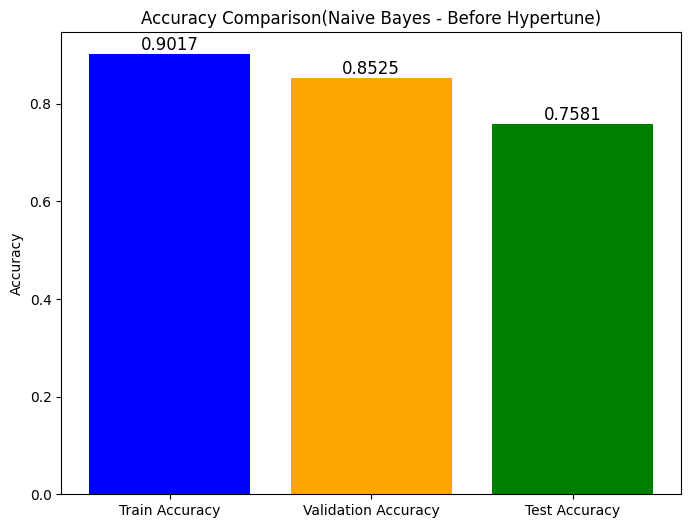

In [134]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_nbB, val_acc_nbB, test_acc_nbB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison(Naive Bayes - Before Hypertune)")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.show()

**After Hypertune**

In [135]:
param_grid = {
    #'var_smoothing': [1e-19, 1e-18, 1e-17, 1e-16, 1e-15]
    #'var_smoothing': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16]
    'var_smoothing': [1e-30, 1e-29, 1e-28, 1e-27, 1e-26]
}

#initialize the naive bayes classifier
nb = GaussianNB()

#GridSearchCV for hyperparameter tuning
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [136]:
#fit GridSearchCV on training set
grid_search_nb.fit(X_trainB, y_trainB)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-30, 1e-29, 1e-28, 1e-27, 1e-26]},
             scoring='accuracy', verbose=2)

In [137]:
#best parameters and model
best_params_nbA = grid_search_nb.best_params_
print("Best Hyperparameters for Naive Bayes:", best_params_nbA)

Best Hyperparameters for Naive Bayes: {'var_smoothing': 1e-30}


In [138]:
#get the best model after tuning
best_nb_model = grid_search_nb.best_estimator_

In [140]:
#predict
# y_Testpred_best_nbA = best_nb_model.predict(X_test)
# y_Valpred_best_nbA = best_nb_model.predict(X_val)

In [141]:
#evaluate the tuned model
y_train_best_pred_nbA = best_nb_model.predict(X_trainB)
y_val_best_pred_nbA = best_nb_model.predict(X_val)
y_test_best_pred_nbA = best_nb_model.predict(X_test)

print("Best Model Train Accuracy(Naive Bayes - After Hypertune):", accuracy_score(y_trainB, y_train_best_pred_nbA))
print("Best Model Validation Accuracy(Naive Bayes - After Hypertune):", accuracy_score(y_val, y_val_best_pred_nbA))
print("Best Model Test Accuracy(Naive Bayes - After Hypertune):", accuracy_score(y_test, y_test_best_pred_nbA))

Best Model Train Accuracy(Naive Bayes - After Hypertune): 0.9016666666666666
Best Model Validation Accuracy(Naive Bayes - After Hypertune): 0.8524590163934426
Best Model Test Accuracy(Naive Bayes - After Hypertune): 0.7580645161290323


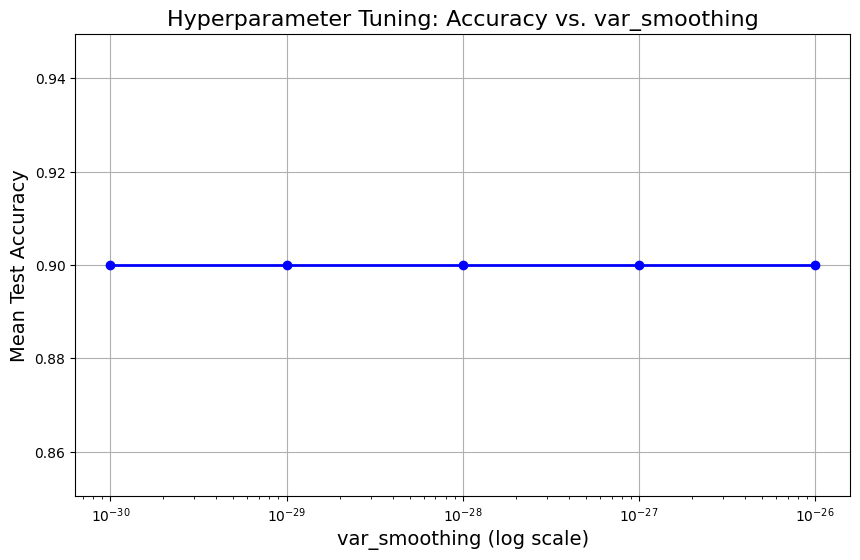

In [142]:
#plot
results = grid_search_nb.cv_results_

mean_test_scores = results['mean_test_score']
param_values = results['param_var_smoothing'].data

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.xscale('log')
plt.xlabel('var_smoothing (log scale)', fontsize=14)
plt.ylabel('Mean Test Accuracy', fontsize=14)
plt.title('Hyperparameter Tuning: Accuracy vs. var_smoothing', fontsize=16)
plt.grid(True)
plt.show()

Identify the optimal var_smoothing value for the model.

Mean Squard Error(MSE)

In [143]:
train_mse_nbA = mean_squared_error(y_trainB, y_train_best_pred_nbA)
val_mse_nbA = mean_squared_error(y_val, y_val_best_pred_nbA)
test_mse_nbA = mean_squared_error(y_test, y_test_best_pred_nbA)

print("Hypertune Naive Bayes Mean Squared Error (MSE) of Training:", train_mse_nbA)
print("Hypertune Naive Bayes Mean Squared Error (MSE) of Validation:", val_mse_nbA)
print("Hypertune Naive Bayes Mean Squared Error (MSE) of Testing:", test_mse_nbA)

Hypertune Naive Bayes Mean Squared Error (MSE) of Training: 0.09833333333333333
Hypertune Naive Bayes Mean Squared Error (MSE) of Validation: 0.14754098360655737
Hypertune Naive Bayes Mean Squared Error (MSE) of Testing: 0.24193548387096775


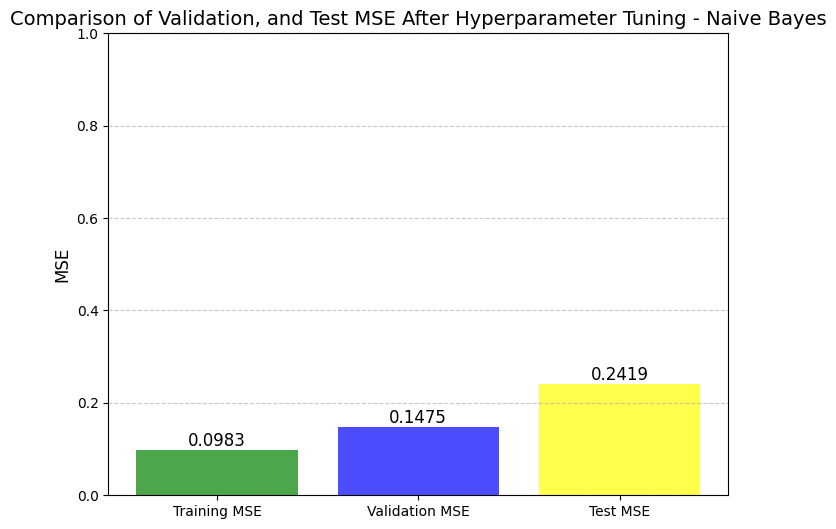

In [144]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [train_mse_nbA, val_mse_nbA, test_mse_nbA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test MSE After Hyperparameter Tuning - Naive Bayes", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 1)
plt.show()

Accuracy

In [146]:
train_acc_nbA = 1 - train_mse_nbA
test_acc_nbA = 1 - test_mse_nbA
val_acc_nbA = 1 - val_mse_nbA

print("Hypertune Naive Bayes Training Accuracy:", train_acc_nbA)
print("Hypertune Naive Bayes Test Accuracy:", test_acc_nbA)
print("Hypertune Naive Bayes Validation Accuracy:", val_acc_nbA)

Hypertune Naive Bayes Training Accuracy: 0.9016666666666666
Hypertune Naive Bayes Test Accuracy: 0.7580645161290323
Hypertune Naive Bayes Validation Accuracy: 0.8524590163934427


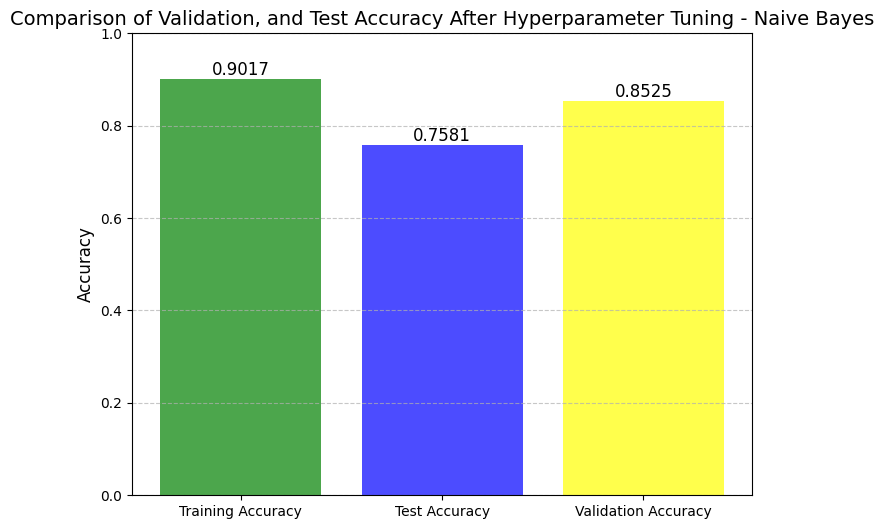

In [147]:
x_labels = ['Training Accuracy', 'Test Accuracy', 'Validation Accuracy']
accuracies = [train_acc_nbA, test_acc_nbA, val_acc_nbA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test Accuracy After Hyperparameter Tuning - Naive Bayes", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confution Matrix

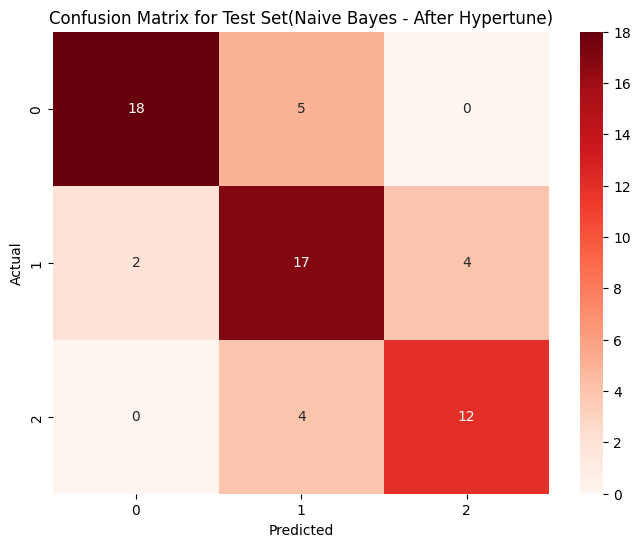

In [148]:
#for the test set
cm = confusion_matrix(y_test, y_test_best_pred_nbA)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(Naive Bayes - After Hypertune)")
plt.show()

Clasification Reports

In [149]:
print("\nClassification Report for Training Set (Naive Bayes - After Hypertune):")
print(classification_report(y_trainB, y_train_best_pred_nbA))

print("\nClassification Report for Validation Set (Naive Bayes - After Hypertune):")
print(classification_report(y_val, y_val_best_pred_nbA))

print("\nClassification Report for Test Set (Naive Bayes - After Hypertune):")
print(classification_report(y_test, y_test_best_pred_nbA))


Classification Report for Training Set (Naive Bayes - After Hypertune):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       377
           1       0.87      0.84      0.85       409
           2       0.87      0.87      0.87       414

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200


Classification Report for Validation Set (Naive Bayes - After Hypertune):
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.86      0.76      0.81        25
           2       0.84      0.96      0.90        27

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61


Classification Report for Test Set (Naive Bayes - After Hypertune):
              precisi

In [150]:
#create a pickle file for Naive Bayes model
nb_AD_model_pickle = open('nb_ADmodel.pkl', 'wb')
pickle.dump(best_nb_model, nb_AD_model_pickle)
nb_AD_model_pickle.close()

.

.

# **Logistic Regression Classifier**

In [202]:
#initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

In [203]:
#train the model
log_reg.fit(X_trainB, y_trainB)

LogisticRegression(max_iter=1000)

**Before Hypertune**

In [204]:
#predict on train, validation, and test sets
y_train_pred_log_regB = log_reg.predict(X_trainB)
y_val_pred_log_regB = log_reg.predict(X_val)
y_test_pred_log_regB = log_reg.predict(X_test)

In [205]:
#classification report
print("\nClassification Report for Training Set(Logistic Regression - Before Hypertuning):")
print(classification_report(y_trainB, y_train_pred_log_regB))

print("\nClassification Report for Validation Set(Logistic Regression - Before Hypertuning):")
print(classification_report(y_val, y_val_pred_log_regB))

print("\nClassification Report for Test Set(Logistic Regression - Before Hypertuning):")
print(classification_report(y_test, y_test_pred_log_regB))


Classification Report for Training Set(Logistic Regression - Before Hypertuning):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       377
           1       0.91      0.91      0.91       409
           2       0.95      0.92      0.93       414

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200


Classification Report for Validation Set(Logistic Regression - Before Hypertuning):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.81      0.88      0.85        25
           2       0.96      0.81      0.88        27

    accuracy                           0.87        61
   macro avg       0.86      0.90      0.88        61
weighted avg       0.88      0.87      0.87        61


Classification Report for Test Set(Logistic Regression - Before Hyper

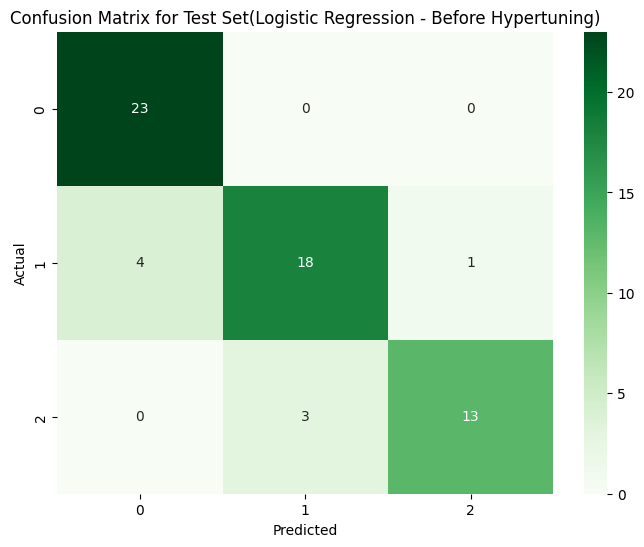

In [206]:
#confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred_log_regB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(Logistic Regression - Before Hypertuning)")
plt.show()

Mean Squard Error(MSE)

In [207]:
train_mse_log_regB = mean_squared_error(y_trainB, y_train_pred_log_regB)
val_mse_log_regB = mean_squared_error(y_val, y_val_pred_log_regB)
test_mse_log_regB = mean_squared_error(y_test, y_test_pred_log_regB)

print(f"Logistic Regression Training Mean Squard Error(MSE) - Before Hypertune: {train_mse_log_regB}")
print(f"Logistic Regression Validation Mean Squard Error(MSE) - Before Hypertune: {val_mse_log_regB}")
print(f"Logistic Regression Test Mean Squard Error(MSE) - Before Hypertune: {test_mse_log_regB}")

Logistic Regression Training Mean Squard Error(MSE) - Before Hypertune: 0.06166666666666667
Logistic Regression Validation Mean Squard Error(MSE) - Before Hypertune: 0.13114754098360656
Logistic Regression Test Mean Squard Error(MSE) - Before Hypertune: 0.12903225806451613


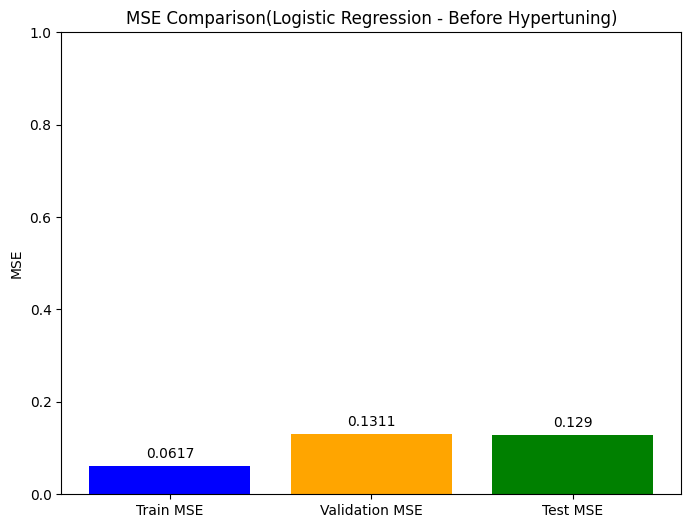

In [208]:
#plot MSE
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_log_regB, val_mse_log_regB, test_mse_log_regB], color=["blue", "orange", "green"])
plt.title("MSE Comparison(Logistic Regression - Before Hypertuning)")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()

Accuracy

In [209]:
train_acc_log_regB = 1 - train_mse_log_regB
val_acc_log_regB = 1 - val_mse_log_regB
test_acc_log_regB = 1 - test_mse_log_regB

print(f"Logistic Regression Training Accuracy(Before Hypertune): {train_acc_log_regB}")
print(f"Logistic Regression Validation Accuracy(Before Hypertune): {val_acc_log_regB}")
print(f"Logistic Regression Test Accuracy(Before Hypertune): {test_acc_log_regB}")

Logistic Regression Training Accuracy(Before Hypertune): 0.9383333333333334
Logistic Regression Validation Accuracy(Before Hypertune): 0.8688524590163934
Logistic Regression Test Accuracy(Before Hypertune): 0.8709677419354839


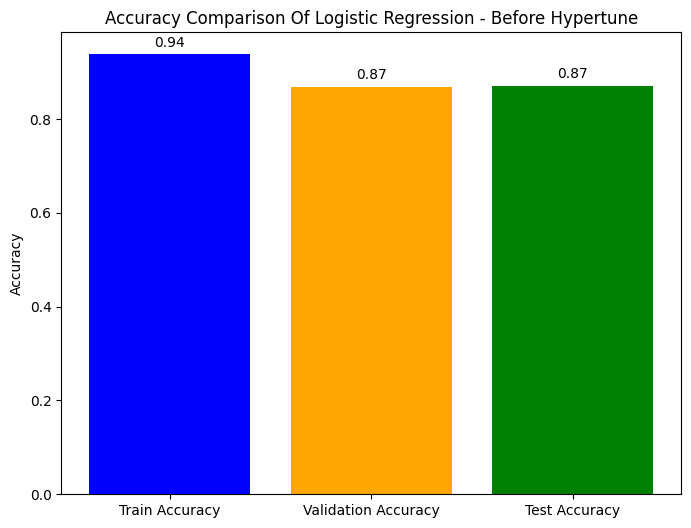

In [210]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_log_regB, val_acc_log_regB, test_acc_log_regB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison Of Logistic Regression - Before Hypertune")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

**After Hypertune**

In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 2000]
}

#initialize the logistic regression model
log_reg = LogisticRegression()

# Use Stratified K-Fold cross-validation to ensure balanced class splits
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV with stratified splits
grid_search_log_reg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    verbose=2,
    n_jobs=-1
)

In [22]:
# Fit the grid search to the training data
grid_search_log_reg.fit(X_trainB, y_trainB)

NameError: name 'X_trainB' is not defined

In [26]:
#get the best parameters
best_params_log_regA = grid_search_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_log_regA)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [27]:
#get the best model after tuning
best_log_reg_model = grid_search_log_reg.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [215]:
#predict
y_Trainpred_best_log_regA = best_log_reg_model.predict(X_trainB)
y_Testpred_best_log_regA = best_log_reg_model.predict(X_test)
y_Valpred_best_log_regA = best_log_reg_model.predict(X_val)

Mean Squard Error

In [216]:
train_mse_log_regA = mean_squared_error(y_trainB, y_Trainpred_best_log_regA)
val_mse_log_regA = mean_squared_error(y_val, y_Valpred_best_log_regA)
test_mse_log_regA = mean_squared_error(y_test, y_Testpred_best_log_regA)

print(f"Hypertuning Mean Squard Error(MSE) of Logistic Regression Training Data: {train_mse_log_regA}")
print(f"Hypertuning Mean Squard Error(MSE) of Logistic Regression Validation Data: {val_mse_log_regA}")
print(f"Hypertuning Mean Squard Error(MSE) of Logistic Regression Testing Data: {test_mse_log_regA}")

Hypertuning Mean Squard Error(MSE) of Logistic Regression Training Data: 0.056666666666666664
Hypertuning Mean Squard Error(MSE) of Logistic Regression Validation Data: 0.13114754098360656
Hypertuning Mean Squard Error(MSE) of Logistic Regression Testing Data: 0.0967741935483871


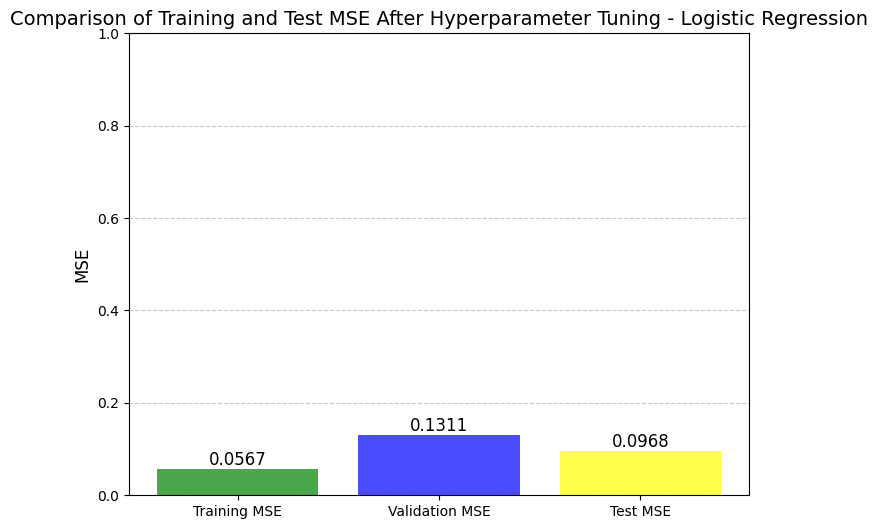

In [217]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [train_mse_log_regA, val_mse_log_regA, test_mse_log_regA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Training and Test MSE After Hyperparameter Tuning - Logistic Regression", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Accuracy

In [218]:
train_acc_log_regA = 1 - train_mse_log_regA
val_acc_log_regA = 1 - val_mse_log_regA
test_acc_log_regA = 1 - test_mse_log_regA

print(f"Logistic Regression Training Accuracy(After Hypertune): {train_acc_log_regA}")
print(f"Logistic Regression Validation Accuracy(After Hypertune): {val_acc_log_regA}")
print(f"Logistic Regression Test Accuracy(After Hypertune): {test_acc_log_regA}")

Logistic Regression Training Accuracy(After Hypertune): 0.9433333333333334
Logistic Regression Validation Accuracy(After Hypertune): 0.8688524590163934
Logistic Regression Test Accuracy(After Hypertune): 0.9032258064516129


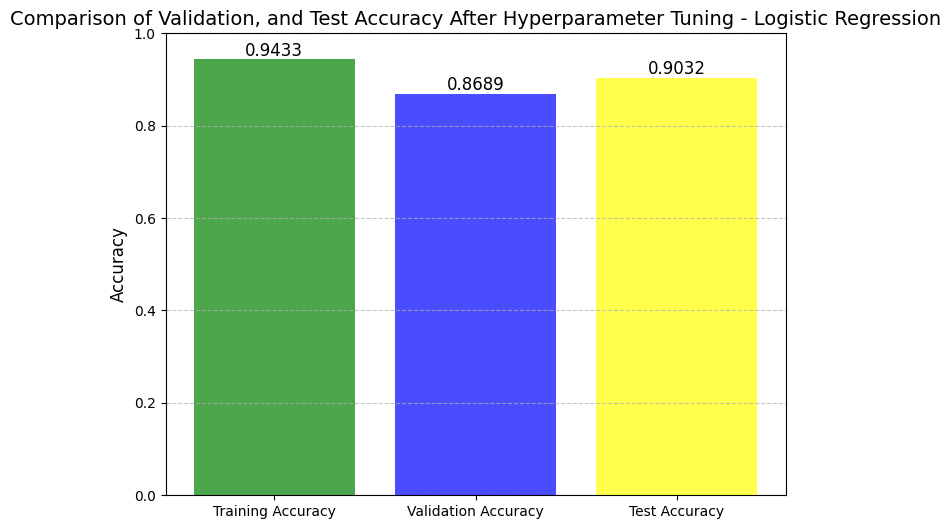

In [219]:
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [train_acc_log_regA, val_acc_log_regA, test_acc_log_regA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test Accuracy After Hyperparameter Tuning - Logistic Regression", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confussion Matrix

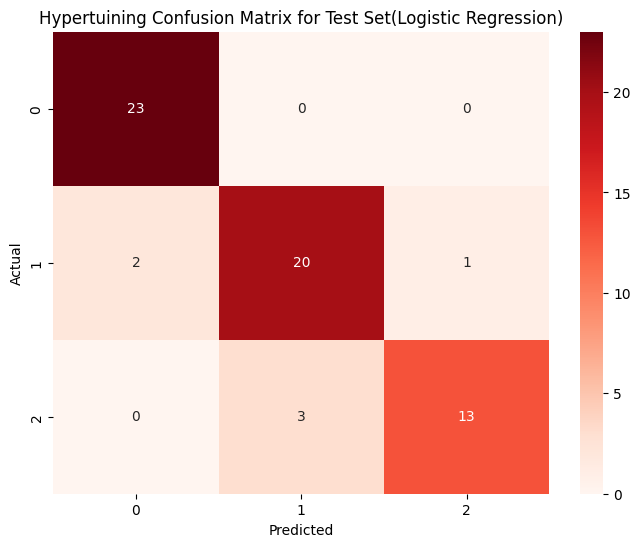

In [220]:
cm = confusion_matrix(y_test, y_Testpred_best_log_regA)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Hypertuining Confusion Matrix for Test Set(Logistic Regression)")
plt.show()

Clasification Report

In [221]:
#for the training set
train_classification_report = classification_report(y_trainB, y_Trainpred_best_log_regA)

#for the validation set
val_classification_report = classification_report(y_val, y_Valpred_best_log_regA)

#for the test set
test_classification_report = classification_report(y_test, y_Testpred_best_log_regA)

#print the classification reports
print("Hypertuining Training Classification Report(Logistic Regression):\n", train_classification_report)
print("Hypertuining Validation Classification Report(Logistic Regression):\n", val_classification_report)
print("\nHypertuining Test Classification Report(Logistic Regression):\n", test_classification_report)

Hypertuining Training Classification Report(Logistic Regression):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       377
           1       0.91      0.92      0.92       409
           2       0.95      0.92      0.94       414

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200

Hypertuining Validation Classification Report(Logistic Regression):
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.81      0.88      0.85        25
           2       0.96      0.81      0.88        27

    accuracy                           0.87        61
   macro avg       0.86      0.90      0.88        61
weighted avg       0.88      0.87      0.87        61


Hypertuining Test Classification Report(Logistic Regression):
               precision    recall  f1-

In [222]:
#create a pickle file for Logistic Regression model
lr_AD_model_pickle = open('lr_ADmodel.pkl', 'wb')
pickle.dump(best_log_reg_model, lr_AD_model_pickle)
lr_AD_model_pickle.close()

.

.

# **Neural Network Model**

In [84]:
#initialize the neural network model
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

In [85]:
#train the model
mlp_model.fit(X_trainB, y_trainB)

MLPClassifier(max_iter=1000, random_state=42)

**Before Hypertune**

In [86]:
#predict on train, validation, and test sets
y_train_pred_mlpB = mlp_model.predict(X_trainB)
y_val_pred_mlpB = mlp_model.predict(X_val)
y_test_pred_mlpB = mlp_model.predict(X_test)

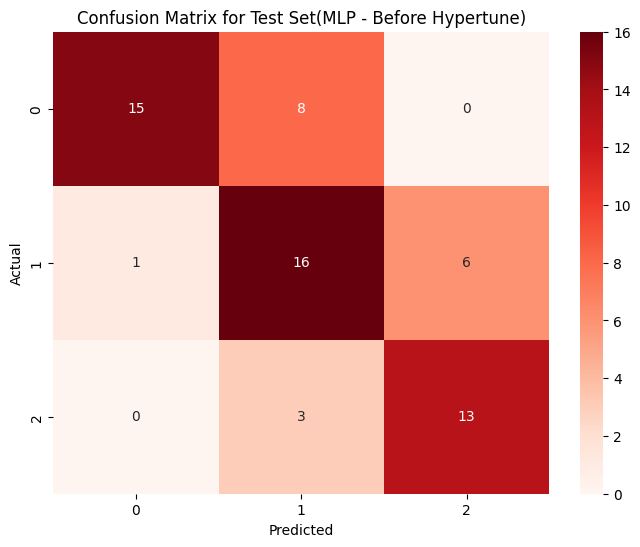

In [87]:
#confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred_mlpB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(MLP - Before Hypertune)")
plt.show()

In [88]:
#classification reports
print("\nClassification Report for Training Set(MLP - Before Hypertune):")
print(classification_report(y_trainB, y_train_pred_mlpB))

print("\nClassification Report for Validation Set(MLP - Before Hypertune):")
print(classification_report(y_val, y_val_pred_mlpB))

print("\nClassification Report for Test Set(MLP - Before Hypertune):")
print(classification_report(y_test, y_test_pred_mlpB))


Classification Report for Training Set(MLP - Before Hypertune):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       414

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Classification Report for Validation Set(MLP - Before Hypertune):
              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.71      0.68      0.69        25
           2       0.82      1.00      0.90        27

    accuracy                           0.75        61
   macro avg       0.68      0.63      0.63        61
weighted avg       0.73      0.75      0.73        61


Classification Report for Test Set(MLP - Before Hypertune):
              precision    recall  f1-score  

Mean Squard Error(MSE)

In [89]:
train_mse_mlpB = mean_squared_error(y_trainB, y_train_pred_mlpB)
val_mse_mlpB = mean_squared_error(y_val, y_val_pred_mlpB)
test_mse_mlpB = mean_squared_error(y_test, y_test_pred_mlpB)

print(f"MLP Training Mean Squard Error(MSE) - Before Hypertune: {train_mse_mlpB}")
print(f"MLP Validation Mean Squard Error(MSE) - Before Hypertune: {val_mse_mlpB}")
print(f"MLP Test Mean Squard Error(MSE) - Before Hypertune: {test_mse_mlpB}")

MLP Training Mean Squard Error(MSE) - Before Hypertune: 0.0
MLP Validation Mean Squard Error(MSE) - Before Hypertune: 0.2459016393442623
MLP Test Mean Squard Error(MSE) - Before Hypertune: 0.2903225806451613


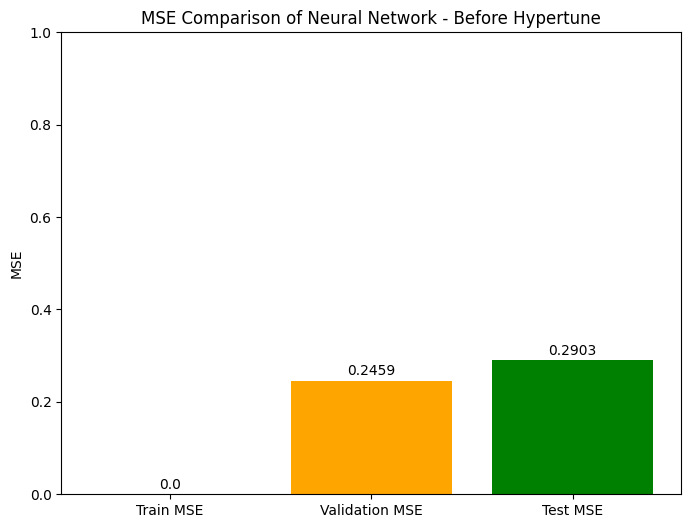

In [90]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_mlpB, val_mse_mlpB, test_mse_mlpB], color=["blue", "orange", "green"])
plt.title("MSE Comparison of Neural Network - Before Hypertune")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha="center", va="bottom", fontsize=10)

plt.ylim(0, 1)
plt.show()

Accuracy

In [91]:
train_acc_mlpB = 1 - train_mse_mlpB
val_acc_mlpB = 1 - val_mse_mlpB
test_acc_mlpB = 1 - test_mse_mlpB

print(f"MLP Training Accuracy - Before Hypertune: {train_acc_mlpB}")
print(f"MLP Validation Accuracy - Before Hypertune: {val_acc_mlpB}")
print(f"MLP Test Accuracy - Before Hypertune: {test_acc_mlpB}")

MLP Training Accuracy - Before Hypertune: 1.0
MLP Validation Accuracy - Before Hypertune: 0.7540983606557377
MLP Test Accuracy - Before Hypertune: 0.7096774193548387


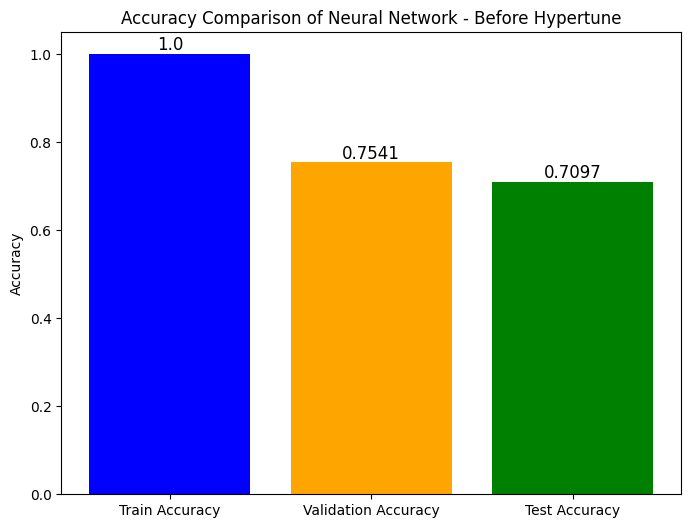

In [92]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_mlpB, val_acc_mlpB, test_acc_mlpB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison of Neural Network - Before Hypertune")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.show()

**After Hypertune**

In [93]:
param_grid = {
    'hidden_layer_sizes': [(25, 25), (25, 50), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

#initialize the MLPClassifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

#fit the grid search to the training data
grid_search_mlp.fit(X_trainB, y_trainB)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(25, 25), (25, 50), (50, 50),
                                                (100, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

In [94]:
#get the best parameters
best_params_mlpA = grid_search_mlp.best_params_
print("Best Hyperparameters for Neural Network:", best_params_mlpA)

Best Hyperparameters for Neural Network: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [95]:
#get the best model after tuning
best_mlp_model = grid_search_mlp.best_estimator_

In [96]:
#evaluate the tuned model
y_train_best_pred_mlpA = best_mlp_model.predict(X_trainB)
y_val_best_pred_mlpA = best_mlp_model.predict(X_val)
y_test_best_pred_mlpA = best_mlp_model.predict(X_test)

print("\nBest Model Training Accuracy(Nueral Network-After Hypertune):", accuracy_score(y_trainB, y_train_best_pred_mlpA))
print("Best Model Validation Accuracy(Nueral Network-After Hypertune):", accuracy_score(y_val, y_val_best_pred_mlpA))
print("Best Model Test Accuracy(Nueral Network-After Hypertune):", accuracy_score(y_test, y_test_best_pred_mlpA))


Best Model Training Accuracy(Nueral Network-After Hypertune): 1.0
Best Model Validation Accuracy(Nueral Network-After Hypertune): 0.7213114754098361
Best Model Test Accuracy(Nueral Network-After Hypertune): 0.7580645161290323


Mean Squard Error(MSE)

In [97]:
train_mse_mlpA = mean_squared_error(y_trainB, y_train_best_pred_mlpA)
val_mse_mlpA = mean_squared_error(y_val, y_val_best_pred_mlpA)
test_mse_mlpA = mean_squared_error(y_test, y_test_best_pred_mlpA)

print("Hypertuining Mean Squared Error (MSE) for MLP of Training Data:", train_mse_mlpA)
print("Hypertuining Mean Squared Error (MSE) for MLP of Validation Data:", val_mse_mlpA)
print("Hypertuining Mean Squared Error (MSE) for MLP of Testing Data:", test_mse_mlpA)

Hypertuining Mean Squared Error (MSE) for MLP of Training Data: 0.0
Hypertuining Mean Squared Error (MSE) for MLP of Validation Data: 0.2786885245901639
Hypertuining Mean Squared Error (MSE) for MLP of Testing Data: 0.24193548387096775


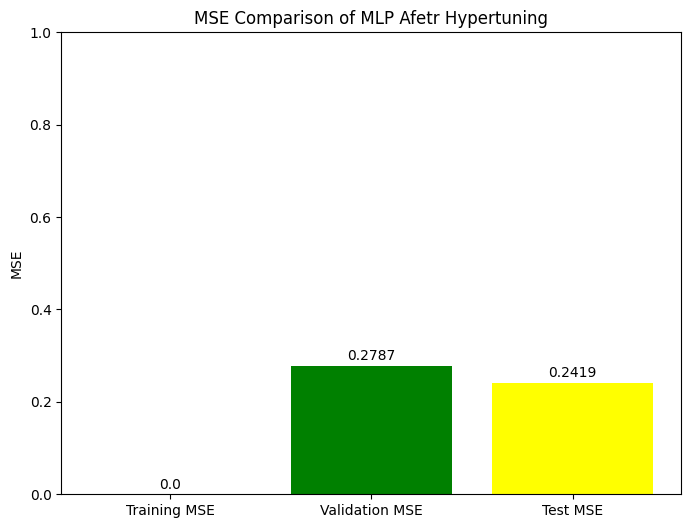

In [98]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Training MSE", "Validation MSE", "Test MSE"], [train_mse_mlpA, val_mse_mlpA, test_mse_mlpA], color=["blue", "green", 'yellow'])
plt.title("MSE Comparison of MLP Afetr Hypertuning")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha="center", va="bottom", fontsize=10)

plt.ylim(0, 1)
plt.show()

Accuracy

In [99]:
train_acc_mlpA = 1 - train_mse_mlpA
val_acc_mlpA = 1 - val_mse_mlpA
test_acc_mlpA = 1 - test_mse_mlpA

print("Hypertuining MLP Training Accuracy of Training Data:", train_acc_mlpA)
print("Hypertuining MLP Validation Accuracy of Validation Data:", val_acc_mlpA)
print("Hypertuining MLP Test Accuracy of Testing Data:", test_acc_mlpA)

Hypertuining MLP Training Accuracy of Training Data: 1.0
Hypertuining MLP Validation Accuracy of Validation Data: 0.7213114754098361
Hypertuining MLP Test Accuracy of Testing Data: 0.7580645161290323


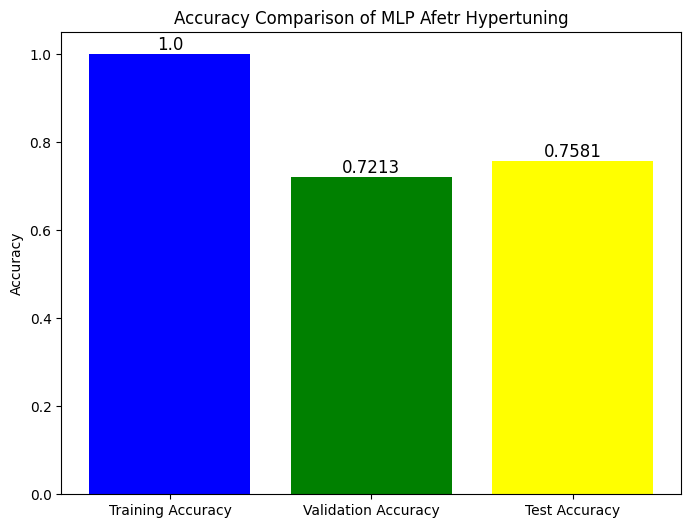

In [100]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Training Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_mlpA, val_acc_mlpA, test_acc_mlpA], color=["blue", "green", 'yellow'])
plt.title("Accuracy Comparison of MLP Afetr Hypertuning")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.show()

Confusion Matrix

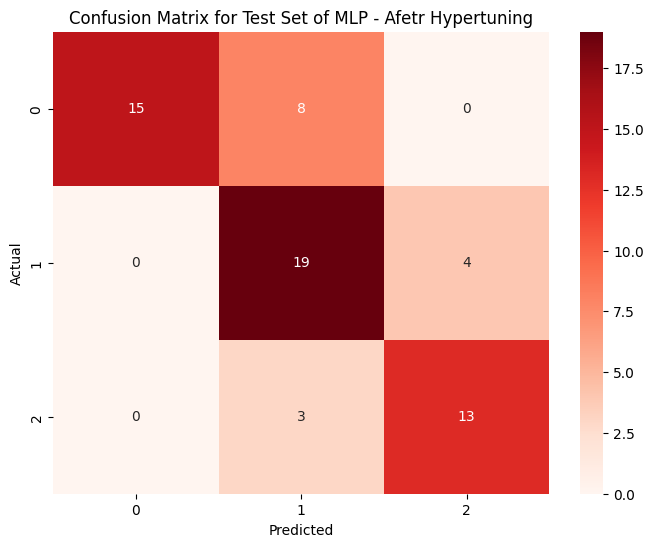

In [102]:
cm = confusion_matrix(y_test, y_test_best_pred_mlpA)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set of MLP - Afetr Hypertuning")
plt.show()

Clasification Report

In [103]:
print("\nHypertuining Classification Report for Training Set (MLP):")
print(classification_report(y_trainB, y_train_best_pred_mlpA))

print("\nHypertuining Classification Report for Validation Set (MLP):")
print(classification_report(y_val, y_val_best_pred_mlpA))

print("\nHypertuining Classification Report for Test Set (MLP):")
print(classification_report(y_test, y_test_best_pred_mlpA))


Hypertuining Classification Report for Training Set (MLP):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       414

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Hypertuining Classification Report for Validation Set (MLP):
              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.67      0.64      0.65        25
           2       0.76      0.96      0.85        27

    accuracy                           0.72        61
   macro avg       0.70      0.61      0.61        61
weighted avg       0.71      0.72      0.69        61


Hypertuining Classification Report for Test Set (MLP):
              precision    recall  f1-score   support

     

In [104]:
#create a pickle file for MLP model
mlp_AD_model_pickle = open('mlp_ADmodel.pkl', 'wb')
pickle.dump(best_mlp_model, mlp_AD_model_pickle)
mlp_AD_model_pickle.close()

.

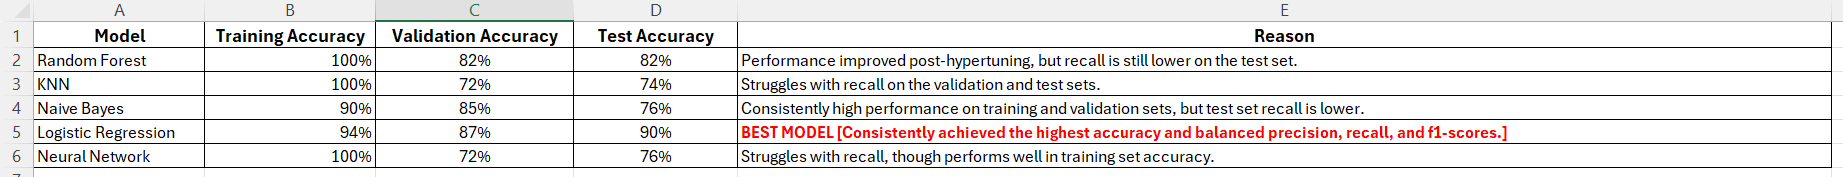

***Best Model - Logistic Regression***

.

.

# **Recommandation System**

**Manually input User Data**

In [223]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [224]:
new_user_manually = {
    'Gender':1,  #male=1, female=0
    'Age': 10,
    'Family Member w/ Autism': 0,   #no family member with autism
    'Gets along with other children': 4,
    'Make eye contact': 3,
    'Express Fellings': 5,
    'Show Empathy':3,
    'Feels happy/angry with reason': 4,
    'Stays Calm': 2,
    'Smiles not less sociably': 3
}

In [225]:
#convert to model format

new_user_data_manually = np.array([[
                           new_user_manually['Gender'],
                           new_user_manually['Age'],
                           new_user_manually['Family Member w/ Autism'],
                           new_user_manually['Gets along with other children'],
                           new_user_manually['Make eye contact'],
                           new_user_manually['Express Fellings'],
                           new_user_manually['Show Empathy'],
                           new_user_manually['Feels happy/angry with reason'],
                           new_user_manually['Stays Calm'],
                           new_user_manually['Smiles not less sociably']]])

In [226]:
def suggest_ADactivities_by_age(AD_Level, age):
    ADactivities = {
        "Mild": {
            "5-8": [
                "Emotion Identification with Facial Expressions: Use flashcards with various facial expressions and have the child identify the emotion.",
                "Role-playing Social Scenarios: Set up social situations and practice them together.",
                "Mindfulness Activities: Teach mindfulness techniques like deep breathing, guided relaxation, or gentle stretching.",
                "Social Stories: Create stories that describe social situations and emotional responses."
            ],
            "9-11": [
                "Social Stories: Create stories that describe social situations and emotional responses.",
                "Group Activities: Participate in board games, team sports, or collaborative art projects."
            ],
            "12-14": [
                "Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.",
                "Advanced Role-playing: Include more complex social scenarios.",
                "Team Collaboration: Engage in group projects requiring teamwork.",
                "Social Stories: Create stories that describe social situations and emotional responses."
            ]
        },
        "Moderate": {
            "5-8": [
                "Emotion Wheel: Use a wheel with different emotions and ask the child to talk about a time they felt that emotion.",
                "Therapeutic Play: Engage in play that allows the child to express emotions through toys."
            ],
            "9-11": [
                "Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.",
                "Social Skills Groups: Place the child in a small group setting with peers to practice communication."
            ],
            "12-14": [
                "Guided Emotional Role-play: Use videos, role-playing, or puppet shows to demonstrate social situations.",
                "Simple Breathing or Calming Techniques: Teach calming techniques like bunny breathing or grounding exercises."
            ]
        },
        "Severe": {
            "5-8": [
                "Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.",
                "Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation."
            ],
            "9-11": [
                "Interactive Music or Sound Therapy: Play calming music or rhythmic sounds.",
                "Story Time with Emotions: Use storybooks that focus on emotions and discuss how the characters might feel."
            ],
            "12-14": [
                "Calming Zones: Create a designated calm space with soft lighting and sensory objects.",
                "Visual Schedules: Use structured routines to help the child understand what activities to expect."
            ]
        }
    }

    #determine the age group
    if 5 <= age <= 8:
        age_group = "5-8"
    elif 9 <= age <= 11:
        age_group = "9-11"
    elif 12 <= age <= 14:
        age_group = "12-14"
    else:
        print("Age out of supported range.")
        return

    #display the relevant activities for the predicted AD level and age group
    print(f"\nRelevant Activities for {AD_Level} Level (Age {age_group}):")
    for ADactivity in ADactivities[AD_Level][age_group]:
        print(f"- {ADactivity}")
    print()

In [227]:
# Predict using the model (logistic regression model)
predicted_ADlevel_manually = best_log_reg_model.predict(new_user_data_manually)

engagement_mapping = {2: "Severe", 1: "Moderate", 0: "Mild"}
print("Affective Domain Level:", engagement_mapping[predicted_ADlevel_manually[0]])

AD_Level_manually = engagement_mapping[predicted_ADlevel_manually[0]]

# Call the function to get activities based on the level and age group
suggest_ADactivities_by_age(AD_Level_manually, new_user_manually['Age'])


Affective Domain Level: Moderate

Relevant Activities for Moderate Level (Age 9-11):
- Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.
- Social Skills Groups: Place the child in a small group setting with peers to practice communication.



.

.

**User Input Data**

Get User Data

In [17]:
def get_valid_ADinput(ADprompt):
    while True:
        user_ADinput = input(ADprompt).strip()
        if not user_ADinput:
            print("Please Enter a Score.")
        elif user_ADinput.isdigit() and 1 <= int(user_ADinput) <= 5:
            return int(user_ADinput)
        else:
            print("Invalid Score. Please Enter a Score between 1 and 5.")

Activities of Affective Domain Level

In [232]:
def suggest_ADactivities_by_age(AD_Level, age):
    ADactivities = {
        "Mild": {
            "5-8": [
                "Emotion Identification with Facial Expressions: Use flashcards with various facial expressions and have the child identify the emotion.",
                "Role-playing Social Scenarios: Set up social situations and practice them together.",
                "Mindfulness Activities: Teach mindfulness techniques like deep breathing, guided relaxation, or gentle stretching.",
                "Social Stories: Create stories that describe social situations and emotional responses."
            ],
            "9-11": [
                "Social Stories: Create stories that describe social situations and emotional responses.",
                "Group Activities: Participate in board games, team sports, or collaborative art projects."
            ],
            "12-14": [
                "Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.",
                "Advanced Role-playing: Include more complex social scenarios.",
                "Team Collaboration: Engage in group projects requiring teamwork.",
                "Social Stories: Create stories that describe social situations and emotional responses."
            ]
        },
        "Moderate": {
            "5-8": [
                "Emotion Wheel: Use a wheel with different emotions and ask the child to talk about a time they felt that emotion.",
                "Therapeutic Play: Engage in play that allows the child to express emotions through toys."
            ],
            "9-11": [
                "Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.",
                "Social Skills Groups: Place the child in a small group setting with peers to practice communication."
            ],
            "12-14": [
                "Guided Emotional Role-play: Use videos, role-playing, or puppet shows to demonstrate social situations.",
                "Simple Breathing or Calming Techniques: Teach calming techniques like bunny breathing or grounding exercises."
            ]
        },
        "Severe": {
            "5-8": [
                "Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.",
                "Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation."
            ],
            "9-11": [
                "Interactive Music or Sound Therapy: Play calming music or rhythmic sounds.",
                "Story Time with Emotions: Use storybooks that focus on emotions and discuss how the characters might feel."
            ],
            "12-14": [
                "Calming Zones: Create a designated calm space with soft lighting and sensory objects.",
                "Visual Schedules: Use structured routines to help the child understand what activities to expect."
            ]
        }
    }

    # Determine age group
    if 5 <= age <= 8:
        age_group = "5-8"
    elif 9 <= age <= 11:
        age_group = "9-11"
    elif 12 <= age <= 14:
        age_group = "12-14"
    else:
        raise ValueError("Age not supported for these activities.")

    # Display activities
    print(f"\nRelevant Activities for {AD_Level} Level (Age {age_group}):")
    activities = ADactivities[AD_Level][age_group]
    for ADactivity in activities:
        print(f"- {ADactivity}")
    print()

    return activities

Predict the Affective Domain Level

In [18]:
def predictUserInput_affective_domain_level():
    print("Please enter the following details:")

    gender = input("Gender (Male=1, Female=0): ").strip()
    while gender not in ["0", "1"]:
        print("Invalid Gender. Please enter 1 for Male or 0 for Female.")
        gender = input("Gender (Male=1, Female=0): ").strip()
    gender = int(gender)  # Convert to integer

    age = input("Age: ").strip()
    while not age.isdigit() or not (5 <= int(age) <= 14):
        print("Invalid Age. Please enter an age between 5 and 14.")
        age = input("Age: ").strip()
    age = int(age)  # Convert to integer

    family_history = input("Family Member with Autism? (Yes=1, No=0): ").strip()
    while family_history not in ["0", "1"]:
        print("Invalid Status. Please enter 1 for Yes or 0 for No.")
        family_history = input("Family Member with Autism? (Yes=1, No=0): ").strip()
    family_history = int(family_history)  # Convert to integer

    print("\n\nPlease enter the marks for the following questions (1 to 5):")
    gets_along = get_valid_ADinput("Gets along with other children: ")
    eye_contact = get_valid_ADinput("Make eye contact: ")
    express_feelings = get_valid_ADinput("Express Feelings: ")
    show_empathy = get_valid_ADinput("Show Empathy: ")
    feels_reason = get_valid_ADinput("Feels happy/angry with reason: ")
    stays_calm = get_valid_ADinput("Stays Calm: ")
    smiles = get_valid_ADinput("Smiles not less sociably: ")

    # Convert inputs to a NumPy array
    user_data_UserInput = np.array([[gender, age, family_history, gets_along, eye_contact,
                                     express_feelings, show_empathy, feels_reason, stays_calm, smiles]]).astype(float)

    # Predict the level using the logistic regression model
    predicted_ADlevel_UserInput = best_log_reg_model.predict(user_data_UserInput)

    # Map prediction to a readable level
    engagement_mapping = {2: "Severe", 1: "Moderate", 0: "Mild"}
    predicted_ADlevel = engagement_mapping[predicted_ADlevel_UserInput[0]]
    print("\nPredicted Affective Domain Level:", predicted_ADlevel)

    # Only return the activities, not the tuple
    activities = suggest_ADactivities_by_age(predicted_ADlevel, age)
    return activities


.

Call the Functions

**Activity 01**

In [28]:
predictUserInput_affective_domain_level()

Please enter the following details:
Invalid Status. Please enter 1 for Yes or 0 for No.
Invalid Status. Please enter 1 for Yes or 0 for No.
Invalid Status. Please enter 1 for Yes or 0 for No.


Please enter the marks for the following questions (1 to 5):


NameError: name 'best_log_reg_model' is not defined

.

**Activity 02**

In [235]:
predictUserInput_affective_domain_level()

Please enter the following details:
Gender (Male=1, Female=0): 0
Age: 5
Family Member with Autism? (Yes=1, No=0): 0


Please enter the marks for the following questions (1 to 5):
Gets along with other children: 2
Make eye contact: 2
Express Feelings: 2
Show Empathy: 2
Feels happy/angry with reason: 1
Stays Calm: 1
Smiles not less sociably: 1

Predicted Affective Domain Level: Severe

Relevant Activities for Severe Level (Age 5-8):
- Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.
- Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation.



['Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.',
 'Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation.']

.

**Activity 03**

In [236]:
predictUserInput_affective_domain_level()

Please enter the following details:
Gender (Male=1, Female=0): 1
Age: 12
Family Member with Autism? (Yes=1, No=0): 0


Please enter the marks for the following questions (1 to 5):
Gets along with other children: 5
Make eye contact: 4
Express Feelings: 3
Show Empathy: 4
Feels happy/angry with reason: 4
Stays Calm: 5
Smiles not less sociably: 5

Predicted Affective Domain Level: Mild

Relevant Activities for Mild Level (Age 12-14):
- Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.
- Advanced Role-playing: Include more complex social scenarios.
- Team Collaboration: Engage in group projects requiring teamwork.
- Social Stories: Create stories that describe social situations and emotional responses.



['Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.',
 'Advanced Role-playing: Include more complex social scenarios.',
 'Team Collaboration: Engage in group projects requiring teamwork.',
 'Social Stories: Create stories that describe social situations and emotional responses.']